## This is HNA or Hybrid SFLA-CSO Network Aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran. 
### All copyright reserved by the author.

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "ce-sc-pop.pickle". Therefore, you must run follow steps: 1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections. 2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 3) Run all remains cells to create results.

# Load Graphs 

In [1]:
import pickle
with open('ce-ce-weighted.pickle', 'rb') as f:
    celist = pickle.load(f)

In [2]:
with open('dm-dm-weighted.pickle', 'rb') as f:
    dmlist = pickle.load(f)

In [3]:
import networkx as nx
G1=nx.Graph()
for i in range(len(celist)):
    if G1.has_node(celist[i][0])==False:
        G1.add_node(celist[i][0])
    if G1.has_node(celist[i][1])==False:
        G1.add_node(celist[i][1])
    G1.add_edge(celist[i][0],celist[i][1],weight=celist[i][2])
G1

In [4]:
G1.number_of_nodes()

2990

In [5]:
G1.number_of_edges()

10078

In [6]:
len(G1)

2990

In [7]:
G2=nx.Graph()
for i in range(len(dmlist)):
    if G2.has_node(dmlist[i][0])==False:
        G2.add_node(dmlist[i][0])
    if G2.has_node(dmlist[i][1])==False:
        G2.add_node(dmlist[i][1])
    G2.add_edge(dmlist[i][0],dmlist[i][1],weight=dmlist[i][2])
G2

In [8]:
print('len G1:', len(G1))

print('len G2:',len(G2))

len G1: 2990
len G2: 7361


# Swap graphs if len G1 > len G2

In [9]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

2990
7361


In [10]:
ed1=G1.edges()

In [11]:
nd1=G1.nodes()

In [12]:
ed2=G2.edges()

In [13]:
len(ed2)

33691

In [14]:
nd2=G2.nodes()

In [15]:
len(ed1)

10078

In [16]:
len(nd1)

2990

In [17]:
el1=list(ed1)
el2=list(ed2)

In [18]:
nd1=list(nd1)
nd2=list(nd2)

In [19]:
degG1 = [val for (node, val) in G1.degree()]


In [20]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [21]:
G_target_na=nx.read_weighted_edgelist('ce-dm.evals')
G_target_na  

In [22]:
gtnode=list(G_target_na.nodes())
print(len(gtnode))
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

#print(gtnode)
print(len(g_t_node))

18588
7419


In [23]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            #b=list(a[0][0].values())
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=a[0])
G_target

In [24]:
len(G_target)

5272

In [25]:
G_target_na=G_target

In [26]:
G_target_na.edges()

EdgeView([('ce4996', 'dm5043'), ('ce4996', 'dm4448'), ('ce4996', 'dm5534'), ('ce4996', 'dm3600'), ('ce4996', 'dm4844'), ('ce4996', 'dm4743'), ('ce4996', 'dm4871'), ('ce4996', 'dm5013'), ('ce4996', 'dm4819'), ('ce4996', 'dm4945'), ('ce4996', 'dm5434'), ('dm5043', 'ce4426'), ('dm5043', 'ce4616'), ('dm5043', 'ce4621'), ('dm5043', 'ce4520'), ('dm5043', 'ce4064'), ('dm4448', 'ce4426'), ('dm4448', 'ce4616'), ('dm4448', 'ce4621'), ('dm4448', 'ce4520'), ('dm4448', 'ce4064'), ('dm5534', 'ce4426'), ('dm5534', 'ce4616'), ('dm5534', 'ce4621'), ('dm5534', 'ce4520'), ('dm5534', 'ce4064'), ('dm3600', 'ce4426'), ('dm3600', 'ce4616'), ('dm3600', 'ce4621'), ('dm3600', 'ce4520'), ('dm3600', 'ce4064'), ('dm4844', 'ce4426'), ('dm4844', 'ce4616'), ('dm4844', 'ce4621'), ('dm4844', 'ce4520'), ('dm4844', 'ce4064'), ('dm4743', 'ce4426'), ('dm4743', 'ce4616'), ('dm4743', 'ce4621'), ('dm4743', 'ce4520'), ('dm4743', 'ce4064'), ('dm4871', 'ce4426'), ('dm4871', 'ce4616'), ('dm4871', 'ce4621'), ('dm4871', 'ce4520'), 

# Compute Score for create similarity matrix 

In [27]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [28]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [29]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [30]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [31]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [32]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [33]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [34]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [35]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [36]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [37]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [38]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

# multi processing for speed up

In [39]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [40]:
#%%prun
import random
import threading

len_pop=300 
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
    
    """for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1) """               
    print('in for loop')
    """for z1 in range(len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])"""
     
    
      
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1
task2
task3
Done!, i= 1
wait
in for loop
task1
task2
task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2
task3
Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2
task3
Done!, i= 14
wait
in for loop
task1
task2
task3
Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1
task2
task3
Done!, i= 173
wait
in for loop
task1
task2task3

Done!, i= 174
wait
in for loop
task1
task2
task3
Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2task3

Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2task3

Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2task3

Done!, i= 189
wait
i

array([[[0.000e+00, 9.260e+02],
        [1.000e+00, 9.260e+02],
        [2.000e+00, 3.045e+03],
        ...,
        [2.987e+03, 4.778e+03],
        [2.988e+03, 6.940e+03],
        [2.989e+03, 3.529e+03]],

       [[0.000e+00, 9.260e+02],
        [1.000e+00, 2.261e+03],
        [2.000e+00, 3.045e+03],
        ...,
        [2.987e+03, 7.270e+03],
        [2.988e+03, 6.191e+03],
        [2.989e+03, 3.529e+03]],

       [[0.000e+00, 9.260e+02],
        [1.000e+00, 1.645e+03],
        [2.000e+00, 2.261e+03],
        ...,
        [2.987e+03, 5.454e+03],
        [2.988e+03, 5.940e+03],
        [2.989e+03, 3.961e+03]],

       ...,

       [[0.000e+00, 2.261e+03],
        [1.000e+00, 2.461e+03],
        [2.000e+00, 2.461e+03],
        ...,
        [2.987e+03, 7.208e+03],
        [2.988e+03, 5.940e+03],
        [2.989e+03, 4.851e+03]],

       [[0.000e+00, 9.260e+02],
        [1.000e+00, 2.261e+03],
        [2.000e+00, 3.045e+03],
        ...,
        [2.987e+03, 5.454e+03],
        [2.988e+03

# Save population

In [33]:
import pickle
with open('ce-dm-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [34]:
import pickle
with open('ce-dm-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

## You can load population if there is save population such as 'ce-dm-pop.pickle'

# Load population

In [ ]:
with open('ce-dm-base_permute', 'rb') as f:
    base_permute = pickle.load(f)

In [ ]:
with open('ce-dm-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [41]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [42]:
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
num_seq=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))

for i in range(len(p)):
    ec=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                           
         if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):
            num_seq[i]+=1  # create sequence matrix 
            map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
            ec=ec+1            
            nc=nc+2
                 
    score_ec[i]=ec/G1.number_of_edges()*100
    score_ics[i]=ec/num_induced*100
    score_s3[i]=ec/(G1.number_of_edges()+num_induced-ec)*100
    score_nc[i]=nc/G1.number_of_nodes()*100 
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100
    """if (score_nc[i] > 100):
        score_nc[i]=100
    if (score_ec[i] > 100):
        score_ec[i]=100
    if (score_ics[i] > 100):
        score_ics[i]=100
    if (score_s3[i] > 100):
        score_s3[i]=100
    if ( score_ncorectness[i]>100):
         score_ncorectness[i]=100"""

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('nc',score_nc)
print('node correctness: ',  score_ncorectness)

ec
[14.29847192 13.9809486  13.67334789 13.50466362 13.38559238 13.31613415
 13.49474102 13.46497321 13.49474102 13.31613415 13.64358008 13.41536019
 13.1672951  13.33597936 13.20698551 13.23675332 13.60388966 13.10775948
 13.53443143 13.50466362 13.30621155 13.06806906 13.47489581 13.39551498
 13.29628895 13.32605676 13.14744989 13.27644374 13.36574717 13.14744989
 13.49474102 13.31613415 13.50466362 13.68327049 13.445128   14.03056162
 13.33597936 13.20698551 13.07799167 13.36574717 13.57412185 13.38559238
 13.18714031 13.10775948 13.29628895 13.39551498 13.50466362 13.32605676
 13.32605676 13.38559238 13.36574717 13.45505061 13.57412185 13.20698551
 13.34590196 13.4352054  13.50466362 13.64358008 13.46497321 13.35582457
 13.45505061 13.47489581 13.67334789 13.27644374 13.50466362 13.39551498
 13.45505061 13.86187736 12.82992657 13.25659853 13.48481842 13.51458623
 13.56419925 13.50466362 13.21690812 13.4352054  13.42528279 13.31613415
 13.39551498 13.36574717 13.29628895 13.45505061

## number of matched sequences 

In [43]:
num_seq

array([1441., 1409., 1378., 1361., 1349., 1342., 1360., 1357., 1360.,
       1342., 1375., 1352., 1327., 1344., 1331., 1334., 1371., 1321.,
       1364., 1361., 1341., 1317., 1358., 1350., 1340., 1343., 1325.,
       1338., 1347., 1325., 1360., 1342., 1361., 1379., 1355., 1414.,
       1344., 1331., 1318., 1347., 1368., 1349., 1329., 1321., 1340.,
       1350., 1361., 1343., 1343., 1349., 1347., 1356., 1368., 1331.,
       1345., 1354., 1361., 1375., 1357., 1346., 1356., 1358., 1378.,
       1338., 1361., 1350., 1356., 1397., 1293., 1336., 1359., 1362.,
       1367., 1361., 1332., 1354., 1353., 1342., 1350., 1347., 1340.,
       1356., 1345., 1338., 1331., 1320., 1332., 1376., 1364., 1361.,
       1343., 1326., 1327., 1343., 1360., 1350., 1358., 1345., 1337.,
       1357., 1349., 1387., 1346., 1348., 1352., 1344., 1326., 1330.,
       1347., 1316., 1356., 1332., 1333., 1374., 1362., 1377., 1330.,
       1346., 1348., 1353., 1356., 1307., 1338., 1361., 1337., 1323.,
       1330., 1305.,

## compute topology score

In [44]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[34976.87673662 34173.81400313 33134.8663339  31909.91809041
 31118.89580685 32542.53401712 32466.55573836 33148.7471936
 32770.85204664 32504.99216205 34943.6431158  33001.01031487
 33096.18663262 32255.74669147 33941.84988479 32624.86197197
 33464.78190986 33789.43924669 34195.0077604  32719.8453326
 32337.76594277 32588.70333559 33862.64133143 33623.22339644
 32777.96389875 31295.67883619 34515.48554532 32608.73749421
 31747.11687014 35734.72225734 32534.37421227 31647.03568103
 34855.04953846 33273.23112145 32273.80215714 33564.85119672
 33198.12038985 32313.11217685 33555.99501201 31010.29605409
 34105.24720228 33010.93418193 35666.97651538 32020.971522
 32444.07346122 34440.31260002 33598.27340285 34013.7592769
 32330.29606924 32794.3437397  33129.31258849 33422.44455951
 32875.5846287  33990.01386833 31902.91650514 32520.52706973
 33343.44404503 33100.63819505 32976.09748259 31854.66176997
 33435.52831049 31309.30913436 32117.21834863 31405.73218374
 31762.13226506 34239.2316682

# Compute Topology and Sequence score

In [45]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([18208.93836831, 17791.40700157, 17256.43316695, 16635.4590452 ,
       16233.94790342, 16942.26700856, 16913.27786918, 17252.8735968 ,
       17065.42602332, 16923.49608103, 18159.3215579 , 17176.50515744,
       17211.59331631, 16799.87334573, 17636.4249424 , 16979.43098599,
       17417.89095493, 17555.21962334, 17779.5038802 , 17040.4226663 ,
       16839.38297138, 16952.85166779, 17610.32066572, 17486.61169822,
       17058.98194937, 16319.33941809, 17920.24277266, 16973.3687471 ,
       16547.05843507, 18529.86112867, 16947.18710613, 16494.51784052,
       18108.02476923, 17326.11556072, 16814.40107857, 17489.42559836,
       17271.06019492, 16822.05608843, 17436.99750601, 16178.64802704,
       17736.62360114, 17179.96709096, 18497.98825769, 16670.985761  ,
       16892.03673061, 17895.15630001, 17479.63670142, 17678.37963845,
       16836.64803462, 17071.67186985, 17238.15629424, 17389.22227975,
       17121.79231435, 17660.50693416, 16623.95825257, 16937.26353487,
      

## Define function for fitness and compute final score

In [46]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [47]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        if G_target_na.has_edge(nd1[x1],nd2[x2]):
            num_seq_temp+=1              
            ec_temp=ec_temp+1            
            nc_temp=nc_temp+2
                 
    score_ec_temp=ec_temp/G1.number_of_edges()*100
    score_ics_temp=ec_temp/counter_induced*100
    score_s3_temp=ec_temp/(G1.number_of_edges()+counter_induced-ec_temp)*100
    score_nc_temp=nc_temp/G1.number_of_nodes()*100
    score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
    """if (score_nc_temp > 100):
        score_nc_temp=100
    if (score_ec_temp > 100):
        score_ec_temp=100
    if (score_ics_temp > 100):
        score_ics_temp=100
    if (score_s3_temp > 100):
        score_s3_temp=100
    if ( score_ncorectness>100):
         score_ncorectness=100"""
    # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('nc',score_nc_temp)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    
    return score_temp,pre,rec,fsc


# HNA: Hybrid SFLA-CSO proposed method

In [48]:
# Implementation of Hybrid SFLA-CSO Algorithm
import random
from operator import itemgetter
from random import shuffle
import concurrent.futures

precision=np.zeros(len_pop)
recall=np.zeros(len_pop)
fscore=np.zeros(len_pop)

dim=len_G1
new_pop=p.tolist()
[new_pop[i].append(score[i]) for i in range(len_pop)]
#[print(new_pop[i][dim]) for i in range(len_pop)]

new_pop=sorted(new_pop, key=itemgetter(dim),reverse=True)
counter_induced=num_induced #0

GBestFrog=new_pop[0]
#print("GBest: ",GBestFrog)

index=0
iteration=2
epoch=0
memeplex=100

group=int(len_pop/memeplex)
len_G1=len(G1)
dim=len_G1
GbestFlag=False
max_score=max(score)
while (epoch<5):
    k=u=0
    #==== Set memeplexes =====
    memp=[]
    memp.append([new_pop[0],new_pop[memeplex],new_pop[2*memeplex]])#,new_pop[3*memeplex],new_pop[4*memeplex]])
    for i in range(1,memeplex):    
        memp.append([new_pop[i],new_pop[i+memeplex],new_pop[i+2*memeplex]])#,new_pop[i+3*memeplex],new_pop[i+4*memeplex]])
    #print('Check memeplex')
    #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
    #=== Local Search =====   
    while(k<memeplex):
        u=0
        print("k ",k)
        print("epoch ",epoch)
        while(u<iteration):
            print("u ",u)
            memp[k]=sorted(memp[k], key=itemgetter(dim),reverse=True)
            #print('Check sort memeplex')
            #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
            #=== set best frog and worst frog 
            bestFrog=memp[k][0]
            worstFrog=memp[k][group-1]            
            #print("BestFrog",bestFrog[dim])
            #print("WorstFrog",worstFrog[dim])
            r1=random.random()
            c1=2
            TeV=(worstFrog[dim]+r1*c1*(bestFrog[dim]-worstFrog[dim]))/100             #number of permutation
           # print(TeV)
                       
            # move 1
            temp_worst=worstFrog    #temp_worst is TeX
            Flag_move1=False
            # counter induced for ics compute            
            """with concurrent.futures.ThreadPoolExecutor() as executor:
                future = executor.submit(induced_function_for_pop, temp_worst)
                counter_induced = future.result()
                #print("counter induced: ",counter_induced)"""
            
            for i in range(int(TeV)):
                #Flag_move1=False
                rand_index1=random.randint(0,dim-1)
                rand_permute=random.sample(base_permute,len_G1)                
                #print('rand1',rand_index1)                                
                if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                                                 
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])                        
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if(G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move1=True
                                    print('move1 ', TeV)                                                                 
            #======== move 2 =======
            Flag_move2=False
            
            if(Flag_move1==False):
                    TeV=(worstFrog[dim]+r1*c1*(GBestFrog[dim]-worstFrog[dim]))/100   #number of random permutation                
                            #print(TeV)                
           
                    temp_worst=worstFrog    #temp_worst is TeX               
                
                    for i in range(int(TeV)):
                        #Flag_move2=False
                        rand_permute=random.sample(base_permute,len_G1)
                        rand_index1=random.randint(0,dim-1)
                        if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                            
                            temp_score=np.argmax(m[rand_index1])
                            #print(nd2[temp_score])
                            #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                            if(G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score                                                                   
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move2=True
                                    print('move2 ', TeV)                                                                      
                    #===== move 3 =====
            
            if(Flag_move1==False and Flag_move2==False):
                TeV=(worstFrog[dim]*random.random()*2)/100             #number of permutation
                                            # print(TeV)
                              
                temp_worst=worstFrog   #temp_worst is TeX                    
                for i in range(int(TeV)):
                    rand_permute=random.sample(base_permute,len_G1)
                    rand_index1=random.randint(0,dim-1) 
                    if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                        
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if (G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                                    
                            temp_worst[rand_index1][1]=temp_score                            
                            Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                            if(Fit_New>worstFrog[dim]):
                                print('w',worstFrog[dim])
                                print('new',Fit_New)
                                temp_worst[dim]=Fit_New
                                memp[k][group-1]=temp_worst  
                                print('move3 ',TeV)
                
            u=u+1
        k=k+1    
    epoch+=1
    #==== combine memeplexes and create new pop ====
    print('*********** fitness **************')    
    new_pop=[]
    for i in range(memeplex):
        for j in range(group):        
            del memp[i][j][dim]
       
    [[new_pop.append(memp[i][j]) for j in range(group)] for i in range(memeplex)]         
    
    for i in range(len_pop):
        Fit,pre,rec,fsc=Fitness(new_pop[i],counter_induced)
        print('Fit pop',Fit)
        new_pop[i].append(Fit)
        score[i]=Fit
        precision[i]=pre
        recall[i]=rec
        fscore[i]=fsc
    
    new_pop=sorted(new_pop, key=itemgetter(dim), reverse=True)
    print('********** new population ************')
    [print('Fitness: ',new_pop[i][dim]) for i in range(len_pop)]
    
    GBestFrog=new_pop[0]
    
#print("GBest: ",GBestFrog)    
print("epoch: ",epoch)
print("score:", score)
#********** print Local Measures *********
print("Precision: ",precision)
print("Recall: ", recall)
print("F-measure: ",fscore)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]):
            map_items.append([nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])])) 

print("end")

k  0
epoch  0
u  0
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16355.50688738

score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390

u  1
score: 16524.369053007053
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
score: 16620.861719077402
score: 16632.923302336254
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score:

score: 16777.662301443546
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
score: 16874.154967516155
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.224869459485
new 16898.278134034437
move1  182.23821141670726
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  182.23821141670726
score: 16910.339717293602
score: 16922.401300552778
w 16910.33

score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  191.62206764770104
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  191.62206764770104
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  191.62206764770104
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  191.62206764770104
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  191.62206764770104
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  191.62206764770104
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  191.62206

score: 16174.583138509222
score: 16186.644721767581
score: 16186.644721767581
score: 16198.706305025953
score: 16210.76788828434
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
u  1
score: 16271.075804576469
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
score: 16295.198971093412
score: 16307

score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  188.15482615442542
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  188.15482615442542
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  188.15482615442542
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  188.15482615442542
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  188.15482615442542
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  188.15482615442542
score: 16994.770800

score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  181.0459047517063
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  181.0459047517063
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  181.0459047517063
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  181.0459047517063
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  181.0459047517063
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  181.0459047517063
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  181.0459047517063
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  181.0459047517063
score: 16982.70921

score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
score: 16862.09338425703
score: 16874.154967516155
w 16864.33949091551
new 16874.154967516155
move1  182.47486159847978
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  182.47486159847978
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  182.47486159847978
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  182.47486159847978
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  182.47486159847978
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  182.47486159847978
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  182.47486159847978

score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  177.33050555438348
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  177.33050555438348
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  177.33050555438348
score: 17248.06404855566
score: 17248.06404855566
k  10
epoch  0
u  0
score: 16295.198971093412
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
score: 16319.32213761041
score: 16331.

score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16391.691637161726
score: 16391.6916

score: 16005.720972893594
score: 16005.720972893594
score: 16017.782556151766
score: 16029.844139409955
score: 16041.905722668154
score: 16041.905722668154
score: 16041.905722668154
score: 16041.905722668154
score: 16041.905722668154
score: 16053.967305926366
score: 16053.967305926366
score: 16053.967305926366
score: 16053.967305926366
score: 16066.028889184592
score: 16066.028889184592
score: 16078.090472442831
score: 16078.090472442831
score: 16090.152055701083
score: 16090.152055701083
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16126

score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
score: 16632.923302336254
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
score: 16729.41596840757
score: 1

score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  169.08518629275358
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  169.08518629275358
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  169.08518629275358
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  169.08518629275358
sc

score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  181.56696302964548
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  181.56696302964548
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  181.56696302964548
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  181.56696302964548
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  181.56696302964548
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  181.56696302964548
score: 17332.49513137284
sc

score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  177.1282337669019
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  177.1282337669019
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  177.1282337669019
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  177.1282337669019
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
n

score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  173.49534301569466
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  173.49534301569466
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  173.49534301569466
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  173.49534301569466
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  173.49534301569466
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  173.49534301569466
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64

score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  186.79616463591773
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  186.79616463591773
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  186.79616463591773
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  186.79616463591773
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  186.79616463591773
score: 16994.770800108126
w 16982.

score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  182.81515584166897
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  182.81515584166897
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  182.81515584166897
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  182.81515584166897
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  182.81515584166897
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
k  20
epoch  0
u  0
score: 162

new 17139.509799220275
move1  168.87501233805517
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  168.87501233805517
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  168.87501233805517
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  168.87501233805517
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  168.87501233805517
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  168.87501233805517
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  168.87501233805517
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  168.87501233805517
k 

score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  188.80371909102948
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  188.80371909102948
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  188.80371909102948
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
k  22
epoch  0
u  0
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756


w 17272.187215074788
new 17284.248798334374
move1  176.248897823251
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  176.248897823251
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  176.248897823251
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  176.248897823251
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  176.248897823251
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  176.248897823251
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  176.248897823251
k  23
epoch  0
u  0
score: 16066.028889184592
score: 16078.0904724

score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  169.75844139840515
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
k  24
epoch  0
u  0
score: 16053.967305926366
score: 16066.028889184592
score: 16066.028889184592
score: 16078.090472442831
score: 16090.152055701083
score: 16102.213638959349
score: 16114.275222217626
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16138.398388734227
score: 16150.459971992545
scor

score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
score: 16512.307469748317
score: 16524.369053007053
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
score:

score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
score: 16295.198971093412
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16391.691637161726
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.876

score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
score: 16451.999553454854
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
score: 16488.18430323089
s

score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
score: 16620.861719077402
score: 16

score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
sc

score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
score: 16138.398388734227
score: 16150.459971992545
score: 16162.521555250878
score: 16162.521555250878
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
score: 16198.706305025953
score: 16210.76788828434
score: 16222.829471542738
score: 16234.89105480115
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
score: 16295.198971093412
score: 16295.198971093412
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
score: 16355.5068

score: 16548.49221952456
score: 16560.55380278333
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
scor

score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16766.21783315496
new 16777.662301443546
move1  172.38198770890295
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  172.38198770890295
score: 16789.723884702573
score: 16789.723884702573
score: 16789.

score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
score: 16283.137387834935
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
score: 16415.814803678935
score: 16427.876386

score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
score: 16765.600718184534
w 16761.15933099638
new 16765.600718184534
move1  180.15954219145127
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  180.15954219145127
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  180.15954219145127
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  180.15954219145127
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  180.15954219145127
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  180.15954219145127
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
mo

w 16765.600718184534
new 16777.662301443546
move1  185.67488982685273
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  185.67488982685273
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  185.67488982685273
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  185.67488982685273
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  185.67488982685273
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  185.67488982685273
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  185.67488982685273
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  185.6

score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16379.63005390314
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814

score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  179.0265746482858
k  37
epoch  0
u  0
score: 16041.905722668154
score: 16041.905722668154
score: 16041.905722668154
score: 16053.967305926366
score: 16066.028889184592
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16102.213638959349
score: 16102.213638959349
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
score: 16126.33680547592
score: 16138.398388734227
score: 16150.459971992545
score: 16150.459971992545
score: 16162.521555250878
score: 16162.521555250878
score: 16174.583138509222
score: 16186.644721767581
score: 16186.644721767581
score: 16198.706305025953
score: 16198.706305025953
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
score: 16234.89105480115
score: 1623

score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
score: 16186.644721767581
score: 16186.644721767581
score: 16198.706305025953
score: 16198.706305025953
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16271.075804576469
score: 16283.137387834935
score: 16295.198971093412
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
score: 16319.32213761041
score: 16331.38372086

score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.9995534

score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  171.50165292262201
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  171.50165292262201
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  171.50165292262201
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  171.50165292262201
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  171.50165292262201
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  171.50165292262201
s

score: 16355.506887386005
score: 16367.568470644565
score: 16379.63005390314
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
score: 16464.061136713

score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  178.40988845168872
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  178.40988845168872
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  178.40988845168872
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  178.40988845168872
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  178.40988845168872
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  178.40988845168

score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  169.77163744365475
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  169.77163744365475
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  169.77163744365475
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  169.77163744365475
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
k  44
epoch  0
u  0
score: 16234.89105480115
score: 16246.952638059578
score: 16259.014221318013
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
score: 16307.260554351906
score: 16319.32213761041
score: 16331.383720868927


score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.9632114942484
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.9632114942484
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  172.9632114942484
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.9632114942484
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  172.9632114942484
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  172.9632114942484
score: 17163.632965739154
k  45
epoch  0
u  0
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.0142213

score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16102.213638959349
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
score: 16138.398388734227
score: 16138.398388734227
score: 16138.398388734227
score: 16138.398388734227
score: 16138.398388734227
score: 16150.459971992545
score: 16150.459971992545
score: 16150.459971992545
score: 16150.459971992545
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
score: 16186.644721767581
score: 16186.644721767581
score: 16186.644721767581
score: 16198.706305025953
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.8294

score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
score: 16693.231218630724
score: 1

score: 16053.967305926366
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16090.152055701083
score: 16090.152055701083
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
score: 16138.398388734227
score: 16138.398388734227
score: 16138.398388734227
score: 16150.459971992545
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16186.

score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  186.05401059175037
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  186.05401059175037
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  186.05401059175037
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  186.05401059175037
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  186.05401059175037
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  186.05401059175037
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  186.05401059175037
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  186.05401059175037
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  186.05401059175037
score: 16801.7854

score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16464.0611367

score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  184.54607139414964
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  184.54607139414964
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  184.54607139414964
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  184.54607139414964
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  184.54607139414964
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  184.54607139414964
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  184.54607139414964
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 

score: 16150.459971992545
score: 16150.459971992545
score: 16150.459971992545
score: 16162.521555250878
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
score: 16186.644721767581
score: 16198.706305025953
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.07

score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16635.45904520413
new 16644.984885595124
move1  182.21300291090967
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  182.21300291090967
sco

score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  173.64571335960443
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  173.64571335960443
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  173.64571335960443
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  173.64571335960443
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  173.64571335960443
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.64571335960443
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.64571335960443
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.495131

score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  172.36862591349697
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  172.36862591349697
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  172.36862591349697
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  172.36862591349697
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  172.36862591349697
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.36862591349697
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.36862591349697
score: 17115.3866327

score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  175.67797375007814
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  175.67797375007814
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  175.67797375007814
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  175.67797375007814
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  175.67797375007814
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  175.67797375007814
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.20188

score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  176.62665729870787
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  176.62665729870787
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  176.62665729870787
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  176.62665729870787
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  176.62665729870787
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  176.6266572987078

score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  177.05052740132527
score: 16862.09338425703
score: 16862.09338425703
k  58
epoch  0
u  0
score: 15909.228306828689
score: 15909.228306828689
score: 15909.228306828689
score: 15921.289890086759
score: 15921.289890086759
score: 15921.289890086759
score: 15921.289890086759
score: 15933.351473344837
score: 15933.351473344837
score: 15945.41305660293
score: 15957.474639861035
score: 15957.474639861035
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15981.597806377289
score: 15981.597806377289
score: 15993.659389635435
score: 15993.659389635435
score: 15993.659389635435
score: 15993.659389635435
score: 15993.659389635435
score: 16005.720972893594
score: 16005.720972893594
score: 16017.782556151766
score: 16029.844139409955
score

score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16439.937970196203
score: 16451.999553454854
score: 16464.06113671352
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
score: 16560.55380278333

score: 16150.459971992545
score: 16150.459971992545
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.1373

score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  173.09557984322404
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  173.09557984322404
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  173.09557984322404
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  173.09557984322404
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  173.09557984322404
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.09557984322404
score: 16801.785

score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  180.57063246982736
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  180.57063246982736
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  180.57063246982736
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  180.57063246982736
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  180.57063246982736
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  180.57063246982736
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  180.57063246982736
score: 16669.108052112897
score: 16669

score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  182.23361216555378
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  182.23361216555378
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  182.23361216555378
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  182.23361216555378
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  182.23361216555378
score: 16910.339717293602
score: 16910.339717293602
score: 16910.33

score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  168.97357620242528
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  168.97357620242528
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  168.97357620242528
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  168.97357620242528
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  168.97357620242528
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  168.97357620242528
score: 16874.15496751

score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  182.3074525607844
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  182.3074525607844
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  182.3074525607844
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  182.3074525607844
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  182.3074525607844
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  182.3

score: 16331.383720868927
score: 16343.445304127461
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16391.691637161726
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
score: 16536.4306362658
score: 16548.49221952456
w 16547.058435070794
new 16548.49221952456
move1  181.934926491416
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.4

score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  169.13845941123967
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  169.13845941123967
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  169.13845941123967
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  169.13845941123967
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  169.13845941123967
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  169.13845941123967
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  169.13845941123967
k  67
epoch  0
u  0
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 1624

score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  170.98298585274136
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  170.98298585274136
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  170.98298585274136
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
k  68
epoch  0
u  0
score: 16029.844139409955
score: 16029.844139409955
score: 16029.844139409955
score: 16041.905722668154
score: 16041.905722668154
score: 16041.905722668154
score: 16053.967305926366
score: 16053.967305926366
score: 16066.028889184592
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442

score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  167.40579812193863
score: 16862.09338425703
score: 16862.09338425703
k  69
epoch  0
u  0
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16523.840722394023
new 16524.369053007053
move1  175.55464648833018


score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  177.7870311488457
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  177.7870311488457
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  177.7870311488457
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  177.7870311488457
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  177.7870311488457
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  177.7870

score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  177.2261595202217
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  177.2261595202217
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  177.2261595202217
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  177.2261595202217
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  177.2261595202217
score: 16886.21

score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  183.28923661461943
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  183.28923661461943
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  183.28923661461943
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  183.28923661461943
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  183.28923661461943
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  183.28923661461943
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
ne

score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  179.45959368862256
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  179.45959368862256
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  179.45959368862256
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  179.45959368862256
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  179.45959368862256
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  179.45959368862256
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  179.45959368862256
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  179.45959368862256
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 168

score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  184.28906948640477
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  184.28906948640477
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  184.28906948640477
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  184.28906948640477
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  184.28906948640477
score: 16765.600718184534


score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16457.047052550086
new 16464.06113671352
move1  183.61180491474653
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  183.61180491474653
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  183.61180491474653
score: 16488.184303230

score: 15848.920390538553
score: 15860.981973796555
score: 15860.981973796555
score: 15860.981973796555
score: 15873.043557054567
score: 15885.105140312595
score: 15885.105140312595
score: 15885.105140312595
score: 15897.166723570635
score: 15897.166723570635
score: 15897.166723570635
score: 15909.228306828689
score: 15909.228306828689
score: 15909.228306828689
score: 15921.289890086759
score: 15933.351473344837
score: 15945.41305660293
score: 15945.41305660293
score: 15945.41305660293
score: 15945.41305660293
score: 15945.41305660293
score: 15957.474639861035
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15981.597806377289
score: 15993.659389635435
score: 16005.720972893594
score: 16005.720972893594
score: 16005.720972893594
score: 16017.782556151766
score: 16017.782556151766
score: 16029.844139409955
score: 16029.844139409955
score: 16029.8441

score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
score: 16283.137387834935
score: 16295.198971093412
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
score: 16331.383720868927
score: 16343.445304127461
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16381.481441315893
new 16391.691637161726
move1  176.56993422558375
score: 16391.691637161726
score: 16403.753220420323
w 16

score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  170.79383523609985
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  170.79383523609985
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.79383523609985
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  170.79383523609985
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  170.79383523609985
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  170.79383523609985
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  170.79383523609985
score: 17103.3250494420

score: 16041.905722668154
score: 16041.905722668154
score: 16053.967305926366
score: 16053.967305926366
score: 16053.967305926366
score: 16053.967305926366
score: 16066.028889184592
score: 16066.028889184592
score: 16078.090472442831
score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16102.213638959349
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
score: 16126.33680547592
score: 16138.398388734227
score: 16150.459971992545
score: 16150.459971992545
score: 16162.521555250878
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
score: 16186.644721767581
score: 16186.644721767581
score: 16186.644721767581
score: 16198.7

score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.40787888627725
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.40787888627725
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  172.40787888627725
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  172.40787888627725
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.40787888627725
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.40787888627725
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  172.40787888627725
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
k  79
epoch  0
u  0
score: 16138.398388734227
scor

score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  168.40760855636802
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  168.40760855636802
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  168.40760855636802
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  168.40760855636802
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  168.40760855636802
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21

score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  167.24042887753595
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  167.24042887753595
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  167.24042887753595
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  167.24042887753595
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  167.24042887753595
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  167.24042887753595
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  167.24042887753595
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 1674

score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  171.50644559611507
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  171.50644559611507
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  171.50644559611507
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  171.50644559611507
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  171.50644559611507
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  171.50644559611507
score: 17006.832383367397
score: 17006.832383367397
score: 17018.8

score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  172.3283275571995
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  172.3283275571995
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  172.3283275571995
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  172.3283275571995
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  172.3283275571995
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  172.3283275571995
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818

score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  167.65997011988145
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  167.65997011988145
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  167.65997011988145
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  167.65997011988145
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  167.65997011988145
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  167.65997011988145


score: 16126.33680547592
score: 16138.398388734227
score: 16150.459971992545
score: 16150.459971992545
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
score: 16186.644721767581
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
score: 16271.075804576469
score: 16283.137387834935
score: 16283.137387834935
score: 16295.1989710934

score: 16246.952638059578
w 16245.356761152452
new 16246.952638059578
move1  182.97836965515467
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  182.97836965515467
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  182.97836965515467
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  182.97836965515467
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  182.97836965515467
score: 16295.198971093412
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  182.97836965515467
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  182.97836965515467
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  182.97836965515467
score: 16343.445304127461
w 1

score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.9777902992097
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.9777902992097
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  172.9777902992097
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  172.9777902992097
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.9777902992097
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.9777902992097
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  172.9777902992097
k  86
epoch  0
u  0
score: 16271.075804576469
w 16233.947903424878
new 16271.075804576469
move1  175.0031025029571
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
mo

score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  169.85845807048446
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  169.85845807048446
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  169.85845807048446
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  169.85845807048446
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  169.85845807048446
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  169.85845807048446
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  169.85845807048446
score: 17043.017133145288
w 17

score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  173.66571384007446
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  173.66571384007446
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  173.66571384007446
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  173.66571384007446
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  173.66571384007446
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  173.66571384007446
score: 16620.861719077402
w 16608.8001358

score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  166.36275198291506
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  166.36275198291506
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  166.36275198291506
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  166.36275198291506
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  166.36275198291506
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  166.36275198291506
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16

score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  181.8007307224878
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  181.8007307224878
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  181.8007307224878
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  181.8007307224878
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  181.8007307224878
score: 16777.66

score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  173.4929036310658
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  173.4929036310658
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  173.4929036310658
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  173.4929036310658
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  173.4929036310658
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559

score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  163.29647763869738
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  163.29647763869738
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  163.29647763869738
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  163.29647763869738
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  163.29647763869738
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  163.29647763869738
score: 16705.29280188966
score: 16

score: 16174.583138509222
w 16167.78732068161
new 16174.583138509222
move1  179.22949560014007
score: 16186.644721767581
w 16174.583138509222
new 16186.644721767581
move1  179.22949560014007
score: 16186.644721767581
score: 16198.706305025953
w 16186.644721767581
new 16198.706305025953
move1  179.22949560014007
score: 16198.706305025953
score: 16198.706305025953
score: 16198.706305025953
score: 16210.76788828434
w 16198.706305025953
new 16210.76788828434
move1  179.22949560014007
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  179.22949560014007
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  179.22949560014007
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1

score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  165.79530756281795
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  165.79530756281795
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  165.79530756281795
score: 16910.339717293602
k  93
epoch  0
u  0
score: 16150.459971992545
score: 16150.459971992545
score: 16162.521555250878
w 16161.147502073887
new 16162.521555250878
move1  164.51037504227705
score: 16174.583138509222
w 16162.521555250878
new 16174.583138509222
move1  164.51037504227705
score: 16186.644721767581
w 16174.583138509222
new 16186.644721767581
move1  164.51037504227705
score: 16186.644721767581
score: 16198.706305025953
w 16186.644721767581
new 16198.706305025953

score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  179.22105991784736
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  179.22105991784736
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  179.22105991784736
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  179.22105991784736
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  179.22105991784736
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  179.22105991784736
score: 16886.21655077529
w 16874.1549675161

score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  180.68441915588772
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  180.68441915588772
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  180.68441915588772
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  180.68441915588772
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  180.68441915588772
score: 1

score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  179.72628690424398
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  179.72628690424398
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  179.72628690424398
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  179.72628690424398
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  179.72628690424398
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  179.72628690424398
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.98488559512

score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  176.61973242152396
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  176.61973242152396
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
k  96
epoch  0
u  0
score: 16078.090472442831
score: 16078.090472442831
score: 16090.152055701083
score: 16102.213638959349
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 

score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  174.69656938215172
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  174.69656938215172
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  174.69656938215172
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  174.69656938215172
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  174.69656938215172
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 1691

score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  177.52040823023717
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  177.52040823023717
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  177.52040823023717
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  177.52040823023717
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
u  1
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  179.25434973247073
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  179.25434973247073
score: 16813.84

score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  160.69377813715758
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  160.69377813715758
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  160.69377813715758
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  160.69377813715758
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  160.69377813715758
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.3074

score: 15933.351473344837
score: 15933.351473344837
score: 15945.41305660293
w 15933.351473344837
new 15945.41305660293
move1  167.10449453718772
score: 15945.41305660293
score: 15957.474639861035
w 15945.41305660293
new 15957.474639861035
move1  167.10449453718772
score: 15957.474639861035
score: 15957.474639861035
score: 15969.536223119156
w 15957.474639861035
new 15969.536223119156
move1  167.10449453718772
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15969.536223119156
score: 15981.597806377289
w 15969.536223119156
new 15981.597806377289
move1  167.10449453718772
score: 15993.659389635435
w 15981.597806377289
new 15993.659389635435
move1  167.10449453718772
score: 16005.720972893594
w 15993.659389635435
new 16005.720972893594
move1  167.10449453718772
score: 16017.782556151766
w 16005.720972893594
new 16017.782556151766
move1  167.10449453718772
score: 16017.782556151766
score: 16017.782556151766
score: 16029.844139409955
w 16017.782556151766

score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  173.0557017520746
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  173.0557017520746
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  173.0557017520746
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.0557017520746
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  173.0557017520746
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  173.0557017520746
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  173.0557017520746
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  173.0557017520746
score: 16850.031800997924
score: 16850.031800997924
score: 16850.

score: 16355.506887386005
Fit pop 16355.506887386005
score: 16958.586050330392
Fit pop 16958.586050330392
score: 16234.89105480115
Fit pop 16234.89105480115
score: 16427.87638693756
Fit pop 16427.87638693756
score: 17151.571382479702
Fit pop 17151.571382479702
score: 16126.33680547592
Fit pop 16126.33680547592
score: 16222.829471542738
Fit pop 16222.829471542738
score: 17163.632965739154
Fit pop 17163.632965739154
score: 16403.753220420323
Fit pop 16403.753220420323
score: 16114.275222217626
Fit pop 16114.275222217626
score: 16970.64763358962
Fit pop 16970.64763358962
score: 16198.706305025953
Fit pop 16198.706305025953
score: 16114.275222217626
Fit pop 16114.275222217626
score: 16946.52446707117
Fit pop 16946.52446707117
score: 16307.260554351906
Fit pop 16307.260554351906
score: 16162.521555250878
Fit pop 16162.521555250878
score: 17248.06404855566
Fit pop 17248.06404855566
score: 16053.967305926366
Fit pop 16053.967305926366
score: 16234.89105480115
Fit pop 16234.89105480115
score: 

score: 16427.87638693756
Fit pop 16427.87638693756
score: 17356.61829789216
Fit pop 17356.61829789216
score: 16632.923302336254
Fit pop 16632.923302336254
score: 16403.753220420323
Fit pop 16403.753220420323
score: 17163.632965739154
Fit pop 17163.632965739154
score: 16644.984885595124
Fit pop 16644.984885595124
score: 16355.506887386005
Fit pop 16355.506887386005
score: 17260.125631815223
Fit pop 17260.125631815223
score: 16186.644721767581
Fit pop 16186.644721767581
score: 16379.63005390314
Fit pop 16379.63005390314
score: 16994.770800108126
Fit pop 16994.770800108126
score: 16415.814803678935
Fit pop 16415.814803678935
score: 16210.76788828434
Fit pop 16210.76788828434
score: 16910.339717293602
Fit pop 16910.339717293602
********** new population ************
Fitness:  17513.418880269033
Fitness:  17513.418880269033
Fitness:  17477.23413048955
Fitness:  17404.864630930948
Fitness:  17380.741464411527
Fitness:  17356.61829789216
Fitness:  17356.61829789216
Fitness:  17344.55671463249

score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  163.9197777638699
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  163.9197777638699
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  163.9197777638699
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  163.9197777638699
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  163.9197777638699
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  163.9197777638699
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
s

score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  182.1713344665182
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  182.1713344665182
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  182.1713344665182
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  182.1713344665182
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  182.1713344665182
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  182.1713344665182
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
sc

score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  179.80980623142997
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  179.80980623142997
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  179.80980623142997
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  179.80980623142997
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  179.80980623142997
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  179.80980623142997
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  179.80980623142997
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  179.80980623142997
score: 16825.908634479747
score: 16825.9

score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  177.07901442499704
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  177.07901442499704
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  177.07901442499704
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  177.07901442499704
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  177.07901442499704
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  177.07901442499704
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  177.07901442499704
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077

score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  172.21516460080528
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  172.21516460080528
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  172.21516460080528
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  172.21516460080528
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  172.21516460080528
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  172.21516460080528
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  172.21516460080528
score: 16391.69163716172

score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.61748513424376
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  172.61748513424376
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
k  4
epoch  1
u  0
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  183.35257661223648
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  183.35257661223648
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  183.35257661223648
score: 16319.32

score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  178.3991624748352
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  178.3991624748352
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  178.3991624748352
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  178.3991624748352
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  178.3991624748352
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  178.3991624748352
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662

score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  179.77693732937175
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  179.77693732937175
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  179.77693732937175
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  179.77693732937175
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  179.77693732937175
score: 16765.600718184534
score: 16765.600718184534
u  1
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  173.182460991105
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.2312

score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  170.158578131526
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  170.158578131526
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  170.158578131526
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  170.158578131526
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  170.158578131526
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  170.158578131526
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  170.158578131526
score:

score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  163.0526277253636
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  163.0526277253636
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  163.0526277253636
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  163.0526277253636
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  163.0526277253636
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  163.0526277253636
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  163.0526277253636
score: 16427.87638693756
score:

score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  170.516927043092
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.516927043092
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  170.516927043092
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  170.516927043092
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  170.516927043092
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  170.516927043092
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  170.516927043092
score: 17115.386632701444
score: 17115.386632701444
score: 17

score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  170.07303390152887
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  170.07303390152887
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  170.07303390152887
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  170.07303390152887
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  170.07303390152887
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  170.07303390152887
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.216550775

score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  169.37361096971546
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  169.37361096971546
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  169.37361096971546
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  169.37361096971546
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  169.37361096971546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  169.37361096971546
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  169.37361096971546
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
sc

score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  171.60362920867215
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  171.60362920867215
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  171.60362920867215
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  171.60362920867215
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  171.60362920867215
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  171.60362920867215
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  171.60362920867215
u  1
score: 16644.984885595124
score: 16644.984885595124
score: 1

score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  171.8853294950365
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  171.8853294950365
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  171.8853294950365
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  171.8853294950365
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  171.8853294950365
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  171.8853294950365
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  171

score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  180.09128448494684
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  180.09128448494684
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  180.09128448494684
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  180.09128448494684
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  180.09128448494684
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  180.09128448494684
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  180.09128448494684
score: 16451.999553454854
score: 16451.999553454854
sc

score: 16295.198971093412
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  166.18583558576378
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  166.18583558576378
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  166.18583558576378
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  166.18583558576378
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  166.18583558576378
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  166.18583558576378
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  166.18583558576378
score: 16391.691637161726

score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  176.34657232916186
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  176.34657232916186
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  176.34657232916186
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  176.34657232916186
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  176.34657232916186
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  176.34657232916186
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
m

score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  175.5388832138989
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  175.5388832138989
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  175.5388832138989
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  175.5388832138989
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  175.5388832138989
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  175.5388832138989
score: 16825.908634479747
score: 

score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  166.97024683811577
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  166.97024683811577
u  1
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  172.0700790020709
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  172.0700790020709
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  172.0700790020709
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  172.0700790020709
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  172.0700790020709
score: 16

score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  168.87729065572478
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  168.87729065572478
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  168.87729065572478
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  168.87729065572478
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  168.87729065572478
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  168.87729065572478
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  168.87729065572478
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  168.87729065572478
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  168.87729065572478

score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  170.81635193546438
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  170.81635193546438
score: 16283.137387834935
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  170.81635193546438
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  170.81635193546438
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  170.81635193546438
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  170.81635193546438
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  170.81635193546438
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  170.81635193546438
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
sc

score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  166.74175580352238
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  166.74175580352238
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  166.74175580352238
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  166.74175580352238
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 1700

score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  173.8396996309293
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  173.8396996309293
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  173.8396996309293
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  173.8396996309293
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  173.8396996309293
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  173.8396996309293
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.8396996309293
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  173.8396996309293
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move

score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  171.7730639510455
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  171.7730639510455
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  171.7730639510455
score: 16681.169635371807
score: 16681.169635371807
u  1
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  173.1304229126799
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  173.1304229126799
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  173.1304229126799
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  173.1304229126799
score: 16657.046468854
score: 16669.108

score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  172.2219805650133
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  172.2219805650133
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  172.2219805650133
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  172.2219805650133
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  172.2219805650133
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  172.2219805650133
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 1662

score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  178.54031087960647
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  178.54031087960647
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  178.54031087960647
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  178.54031087960647
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  178.54031087960647
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  178.54031087960647
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352


score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  174.63009086389127
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  174.63009086389127
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  174.63009086389127
score: 16295.198971093412
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  174.63009086389127
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  174.63009086389127
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  174.63009086389127
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  174.63009086389127
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  174.63009086389127
s

score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  176.25326830163186
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  176.25326830163186
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  176.25326830163186
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  176.25326830163186
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  176.25326830163186
score: 16946.52446707117
score: 16946.52446707117
score: 16

score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  172.86343005329513
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  172.86343005329513
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  172.86343005329513
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  172.86343005329513
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  172.86343005329513
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  172.86343005329513
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  172.86343005329513
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
s

score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  176.90471442378526
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  176.90471442378526
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  176.90471442378526
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  176.90471442378526
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  176.90471442378526
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  176.90471442378526
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  176.90471442378526
score: 16657.046468854
score: 16657.046468854
score: 166

score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  169.55148515186605
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  169.55148515186605
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  169.55148515186605
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  169.55148515186605
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  169.55148515186605
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  169.55148515186605
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  169.55148515186605


score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  171.02205402647203
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  171.02205402647203
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  171.02205402647203
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  171.02205402647203
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.3

score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  174.5387869510339
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  174.5387869510339
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  174.5387869510339
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  174.5387869510339
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.6623014435

score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  164.84031001044258
u  1
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  174.13457005211995
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  174.13457005211995
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  174.13457005211995
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  174.13457005211995
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  174.13457005211995
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719

score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  169.94115862998714
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  169.94115862998714
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  169.94115862998714
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  169.94115862998714
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  169.94115862998714
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  169.94115862998714
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469

score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  163.9949274115765
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  163.9949274115765
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  163.9949274115765
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  163.9949274115765
score: 16283.137387834935
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  163.9949274115765
score: 16

score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  175.03893064166095
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
k  30
epoch  1
u  0
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  170.70835736849634
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  170.70835736849634
score: 16259.014221318013
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  170.70835736849634
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935

score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  170.51726066919895
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  170.51726066919895
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  170.51726066919895
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  170.51726066919895
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  170.51726066919895
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  170.51726066919895
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  170.51726066919895
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  170

score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  169.9065379554248
score: 16681.169635371807
u  1
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  176.59431751090415
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  176.59431751090415
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  176.59431751090415
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  176.59431751090415
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  176.59431751090415
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 1

score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  177.0729144256906
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  177.0729144256906
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  177.0729144256906
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  177.0729144256906
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  177.0729144256906
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  177.0729144256906
score: 16524.36905300

score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  172.11922592079122
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.11922592079122
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
k  33
epoch  1
u  0
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  179.0107065411065
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  179.0107065411065
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  179.0107065411065
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  179.0107065411065
score: 16271.075804576469
score

score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  173.15248253715382
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  173.15248253715382
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  173.15248253715382
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  173.15248253715382
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  173.15248253715382
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.15248253715382
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  173.15248253715382
score: 16813.84705122067
sco

score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  167.8179656208018
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  167.8179656208018
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  167.8179656208018
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  167.8179656208018
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  167.8179656208018
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  167.8179656208018
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  167.8179656208018
score: 16632.923302336254
score: 16644.984

score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  178.15789290847349
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  178.15789290847349
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  178.15789290847349
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  178.15789290847349
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  178.15789290847349
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  178.15789290847349
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369

w 16319.32213761041
new 16331.383720868927
move1  163.18105041097886
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  163.18105041097886
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  163.18105041097886
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  163.18105041097886
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  163.18105041097886
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  163.18105041097886
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  163.18105041097886
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323


score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  171.0783881627397
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  171.0783881627397
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  171.0783881627397
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  171.0783881627397
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
w 16283.13

score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  174.9857621105995
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  174.9857621105995
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  174.9857621105995
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  174.9857621105995
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
k  38
epoch  1
u  0
score: 16210.76788828434
score: 16210.76788

score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  164.63286882346955
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  164.63286882346955
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  164.63286882346955
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  164.63286882346955
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  164.63286882346955
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  164.63286882346955
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155


score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  172.70900656573488
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  172.70900656573488
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  172.70900656573488
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  172.70900656573488
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  172.70900656573488
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  172.7090065657

score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  171.22691890390755
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  171.22691890390755
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  171.22691890390755
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  171.22691890390755
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  171.22691890390755
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  171.22691890390755
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
mov

score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  180.33566216994888
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  180.33566216994888
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  180.33566216994888
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  180.33566216994888
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  180.33566216994888
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  180.33566216994888
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  180.33566216994888
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  180.33566216994888
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  180.33566216994888
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18

score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  171.86780367091208
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  171.86780367091208
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  171.86780367091208
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  171.86780367091208
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  171.86780367091208
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  171.86780367091208
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  171.86780367091208
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  171.86780367091208
score: 16403.753220420323
score: 16403.753220420323
scor

score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  164.7408063098318
score: 16295.198971093412
score: 16295.198971093412
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  164.7408063098318
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  164.7408063098318
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  164.7408063098318
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  164.7408063098318
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  164.7408063098318
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887

score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  172.3410115483478
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  172.3410115483478
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  172.3410115483478
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  172.3410115483478
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  172.3410115483478
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  172.3410115483478
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968

score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  174.37724921547294
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  174.37724921547294
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  174.37724921547294
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  174.37724921547294
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  174.37724921547294
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  174.37724921547294
s

score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  166.55472497946803
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  166.55472497946803
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  166.55472497946803
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  166.55472497946803
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  166.55472497946803
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  166.55472497946803
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  166.55472497946803
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.73855

score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  179.2247762530422
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  179.2247762530422
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  179.2247762530422
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  179.2247762530422
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  179.2247762530422
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  179.2247762530422
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  179.2247762530422
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  179.2247762530422
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  179.2247762530422
score: 16729.41596840757
score: 16729.41596840757
score: 1

score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  171.1246060251337
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  171.1246060251337
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  171.1246060251337
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  171.1246060251337
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  171.1246060251337
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  171.1246060251337
score: 16476.122719972198
score: 16476.122719972198


score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  177.23888800806188
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  177.23888800806188
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  177.23888800806188
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  177.23888800806188
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  177.23888800806188
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  177.23888800806188
score: 16403.753220420323
score: 16403.753220420323
score: 16415.8

score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  171.42788609885218
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  171.42788609885218
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  171.42788609885218
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  171.42788609885218
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  171.42788609885218
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  171.42788609885218
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  171.42788609885218
score: 16898.278134034437
s

score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  177.5253226092401
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  177.5253226092401
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  177.5253226092401
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  177.5253226092401
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  177.5253226092401
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  177.5253226092401
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  177.5253226092401
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  177.5253226092401
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  177.5253226092401
score: 16644.984885595124
w 16632.

new 16548.49221952456
move1  168.463038918241
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  168.463038918241
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  168.463038918241
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  168.463038918241
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  168.463038918241
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  168.463038918241
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  168.463038918241
score: 16620.8617190774

score: 16295.198971093412
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  170.58202102460712
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  170.58202102460712
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  170.58202102460712
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  170.58202102460712
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  170.58202102460712
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  170.58202102460712
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  170.58202102460712
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  170

score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  175.4133234827797
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  175.4133234827797
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  175.4133234827797
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  175.4133234827797
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  175.4133234827797
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703

score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  167.4352387663309
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  167.4352387663309
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  167.4352387663309
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  167.4352387663309
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  167.4352387663309
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.73855

score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  175.67300533572924
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  175.67300533572924
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  175.67300533572924
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  175.673005335729

score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  176.93442688160005
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  176.93442688160005
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  176.93442688160005
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  176.93442688160005
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  176.93442688160005
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  176.93442688160005
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  176.9344268816

score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  175.32808133445752
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  175.32808133445752
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  175.32808133445752
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  175.32808133445752
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  175.32808133445752
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  175.32808133445752
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089

score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16174.583138509222
score: 16186.644721767581
w 16174.583138509222
new 16186.644721767581
move1  176.80818876450263
score: 16198.706305025953
w 16186.644721767581
new 16198.706305025953
move1  176.80818876450263
score: 16198.706305025953
score: 16198.706305025953
score: 16210.76788828434
w 16198.706305025953
new 16210.76788828434
move1  176.80818876450263
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  176.80818876450263
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  176.80818876450263
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  176.80818876450263
score: 16246.952638059578
score: 16246.952638059

score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  171.42468241293068
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  171.42468241293068
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  171.42468241293068
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  171.42468241293068
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  171.42468241293068
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  171.42468241293068
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
s

score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  165.5882734842526
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  165.5882734842526
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  165.5882734842526
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  165.5882734842526
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  165.5882734842526
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
sc

score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  166.86892005892895
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  166.86892005892895
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  166.86892005892895
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  166.86892005892895
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  166.86892005892895
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  166.86892005892895
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  166.86892005892895
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  166.86892005892895
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.

score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  167.88867293138603
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  167.88867293138603
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  167.88867293138603
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  167.88867293138603
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  167.88867293138603
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  167.88867293138603
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  167.88867293138603
score: 16632.923302336254
u  1
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678

score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  171.91859615721586
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  171.91859615721586
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  171.91859615721586
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  171.91859615721586
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  171.91859615721586
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  171.91859615721586
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move

score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  171.23249754663019
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  171.23249754663019
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  171.23249754663019
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  171.23249754663019
score: 16259.014221318013
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  171.23249754663019
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  171.23249754663019
score: 16283.137387834935
score: 16283.13

score: 16186.644721767581
score: 16198.706305025953
w 16186.644721767581
new 16198.706305025953
move1  164.37362865610447
score: 16198.706305025953
score: 16210.76788828434
w 16198.706305025953
new 16210.76788828434
move1  164.37362865610447
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  164.37362865610447
score: 16222.829471542738
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  164.37362865610447
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  164.37362865610447
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  164.37362865610447
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  164.37362865610447
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  164.37362865610447
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
scor

score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  173.43982648895636
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  173.43982648895636
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  173.43982648895636
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  173.43982648895636
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  173.43982648895636
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  173.43982648895636
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.43982648895636
score: 16801.78546796162
sc

score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  169.9800931859115
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  169.9800931859115
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  169.9800931859115
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  169.9800931859115
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  169.9800931859115
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  169.9800931859115
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  169.9800931859115
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.430

score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  168.80710417196758
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  168.80710417196758
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  168.80710417196758
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  168.80710417196758
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  168.80710417196758
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  168.80710417196758
score: 16488.18430323089
w 16476.122719972198
new

score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  175.66625218581498
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  175.66625218581498
score: 16379.63005390314
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  175.66625218581498
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  175.66625218581498
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  175.66625218581498
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87

score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  161.0879152519038
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  161.0879152519038
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  161.0879152519038
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  161.0879152519038
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  161.0879152519038
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  161.0879152519038
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  161.0879152519038
score: 16343.445304127461
s

score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  172.78231406748353
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  172.78231406748353
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  172.78231406748353
k  67
epoch  1
u  0
score: 16090.152055701083
score: 16090.152055701083
score: 16090.152055701083
score: 16102.213638959349
w 16090.152055701083
new 16102.213638959349
move1  175.7765756414194
score: 16102.213638959349
score: 16114.275222217626
w 16102.213638959349
new 16114.275222217626
move1  175.7765756414194
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
w 16114.2752

score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  164.6723612455974
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  164.6723612455974
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  164.6723612455974
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  164.6723612455974
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  164.6723612455974
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  164.6723612455974
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  164.6723612455974
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  164.6723612455974
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  164.6723612

score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
u  1
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  173.17172062407997
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  173.17172062407997
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  173.17172062407997
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  173.17172062407997
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.99955345485

score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  166.87215934786428
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  166.87215934786428
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  166.87215934786428
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  166.87215934786428
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  166.87215934786428
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  166.87215934786428
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753

score: 16174.583138509222
w 16162.521555250878
new 16174.583138509222
move1  176.2436487873035
score: 16174.583138509222
score: 16186.644721767581
w 16174.583138509222
new 16186.644721767581
move1  176.2436487873035
score: 16198.706305025953
w 16186.644721767581
new 16198.706305025953
move1  176.2436487873035
score: 16198.706305025953
score: 16198.706305025953
score: 16210.76788828434
w 16198.706305025953
new 16210.76788828434
move1  176.2436487873035
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  176.2436487873035
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  176.2436487873035
score: 16234.89105480115
score: 16246.952638059

score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
k  71
epoch  1
u  0
score: 16078.090472442831
w 16066.028889184592
new 16078.090472442831
move1  174.0023540276151
score: 16090.152055701083
w 16078.090472442831
new 16090.152055701083
move1  174.0023540276151
score: 16090.152055701083
score: 16090.152055701083
score: 16102.213638959349
w 16090.152055701083
new 16102.213638959349
move1  174.0023540276151
score: 16102.213638959349
score: 16114.275222217626
w 16102.213638959349
new 16114.275222217626
move1  174.0023540276151
score: 16114.275222217626
score: 16114.275222217626
score: 16126.33680547592
w 16114.275222217626
new 16126.33680547592
move1  174.0023540276151
score: 16138.398388734227
w 16126.33680547592
new 16138.398388734227
move1  174.0023540276151
score: 16138.398388734227
score: 16138.398388734227
score: 16138.398388734227
score

score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  168.10647195429826
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  168.10647195429826
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  168.10647195429826
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  168.10647195429826
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  168.10647195429826
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  168.10647195429826
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  168.10647195429826
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  168.10647195429826
score: 16753.53913492553
w 16741.4775516

score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  168.9746845763878
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  168.9746845763878
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  168.9746845763878
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  168.9746845763878
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  168.9746845763878
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  168.9746845763878
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  168.9746845763878
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  168.9746845763878
score: 16608.800135818557
sco

score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  173.34634026749347
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  173.34634026749347
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  173.34634026749347
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  173.34634026749347
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  173.34634026749347
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  173.34634026749347
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  173.34634026749347
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.

score: 16186.644721767581
score: 16198.706305025953
w 16186.644721767581
new 16198.706305025953
move1  174.1099605430019
score: 16198.706305025953
score: 16210.76788828434
w 16198.706305025953
new 16210.76788828434
move1  174.1099605430019
score: 16210.76788828434
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  174.1099605430019
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  174.1099605430019
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  174.1099605430019
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  174.1099605430019
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  174.1099605430019
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  174.1099605430019
score: 16295.198971093412
w 16283.137387834935
new 16295.19897109341

score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  164.1814502089418
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  164.1814502089418
k  75
epoch  1
u  0
score: 16053.967305926366
score: 16053.967305926366
score: 16053.967305926366
score: 16053.967305926366
score: 16066.028889184592
w 16053.967305926366
new 16066.028889184592
move1  178.63415556786262
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16066.028889184592
score: 16078.090472442831
w 16066.028889184592
new 16078.090472442831
move1  178.63415556786262
score: 16090.152055701083
w 16078.090472442831
new 16090.152055701083
move1  178

score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  168.5068225975252
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  168.5068225975252
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  168.5068225975252
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  168.5068225975252
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  168.5068225975252
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  168.5068225975252
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  168.5068225975252
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
scor

score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  165.57641658839594
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  165.57641658839594
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  165.57641658839594
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  165.57641658839594
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  165.57641658839594
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  165.57641658839594
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  165.57641658839594
score: 16596.738552559735
score: 16608.

score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  174.19332732987735
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  174.19332732987735
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  174.19332732987735
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  174.19332732987735
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  174.19332732987735
score: 16451.99955

score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  162.6793395258357
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  162.6793395258357
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16283.137387834935
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  162.6793395258357
score: 16295.198971093412
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  162.6793395258357
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  162.6793395258357
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  162.6793395258357
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
mo

score: 16126.33680547592
w 16114.275222217626
new 16126.33680547592
move1  169.89760958040262
score: 16126.33680547592
score: 16138.398388734227
w 16126.33680547592
new 16138.398388734227
move1  169.89760958040262
score: 16150.459971992545
w 16138.398388734227
new 16150.459971992545
move1  169.89760958040262
score: 16150.459971992545
score: 16162.521555250878
w 16150.459971992545
new 16162.521555250878
move1  169.89760958040262
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16162.521555250878
score: 16174.583138509222
w 16162.521555250878
new 16174.583138509222
move1  169.89760958040262
score: 16174.583138509222
score: 16186.644721767581
w 16174.583138509222
new 16186.644721767581
move1  169.89760958040262
score: 16198.706305025953
w 16186.644721767581
new 16198.706305025953
move1  169.89760958040262
score: 16210.76788828434
w 16198.706305025953
new 16210.76788828434
move1  169.89760958040262
score: 16222.829471542738
w 16

score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  170.96968880964153
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  170.96968880964153
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  170.96968880964153
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  170.96968880964153
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  170.96968880964153
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  170.96968880964153
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  170.96968880964153
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  170.96968880964153
score: 16753.539134

score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  167.94081607364456
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  167.94081607364456
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  167.94081607364456
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  167.94081607364456
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  167.94081607364456
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.92330

score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  168.64905381363016
score: 16415.814803678935
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  168.64905381363016
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  168.64905381363016
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  168.64905381363016
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  168.64905381363016
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  168.64905381363016
score: 16476.12271997

score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  162.8928942789687
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  162.8928942789687
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  162.8928942789687
score: 16512.307469748317
u  1
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  165.5705237157361
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  165.5705237157361
score: 163

score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  166.61421253145167
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  166.61421253145167
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  166.61421253145167
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  166.61421253145167
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  166.61421253145167
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  166.61421253145167
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  166.61421253145167
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  166.61421253145167
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  166.61421253145167
score: 16331

score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  173.33511126413978
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.33511126413978
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  173.33511126413978
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  173.33511126413978
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  173.33511126413978
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  173.33511126413978
score: 16850.031800997924
k  84
epoch  1
u  0
score: 15981.597806377289
score: 15981.597806377289
score: 15993.659389635435
w 15981.597806377289
new 15993.659389635435
move1  162.44934619546123
score: 15993.659389635435
score: 15993.659389635435
score: 16005.720972893594
w 15993.659389635435
new 1600

score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  165.3560133795975
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  165.3560133795975
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  165.3560133795975
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  165.3560133795975
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  165.3560133795975
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  165.3560133795975
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  165.3560133795975
score: 16753.5391

score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  170.76239940285177
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  170.76239940285177
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  170.76239940285177
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  170.76239940285177
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  170.76239940285177
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  170.76239940285177
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  170.76239940285177
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.492

score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  177.37897318153682
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  177.37897318153682
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  177.37897318153682
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  177.37897318153682
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  177.37897318153682
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  177.37897318153682
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  177.37897318153682
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 1

score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16210.76788828434
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  160.37289516994326
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  160.37289516994326
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  160.37289516994326
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  160.37289516994326
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  160.37289516994326
score: 16271.075804576469
score: 1

score: 16005.720972893594
w 15993.659389635435
new 16005.720972893594
move1  166.08588362331787
score: 16005.720972893594
score: 16017.782556151766
w 16005.720972893594
new 16017.782556151766
move1  166.08588362331787
score: 16029.844139409955
w 16017.782556151766
new 16029.844139409955
move1  166.08588362331787
score: 16041.905722668154
w 16029.844139409955
new 16041.905722668154
move1  166.08588362331787
score: 16041.905722668154
score: 16041.905722668154
score: 16053.967305926366
w 16041.905722668154
new 16053.967305926366
move1  166.08588362331787
score: 16066.028889184592
w 16053.967305926366
new 16066.028889184592
move1  166.08588362331787
score: 16066.028889184592
score: 16078.090472442831
w 16066.028889184592
new 16078.090472442831
move1  166.08588362331787
score: 16078.090472442831
score: 16078.090472442831
score: 16078.090472442831
score: 16090.152055701083
w 16078.090472442831
new 16090.152055701083
move1  166.08588362331787
score: 16102.213638959349
w 16090.152055701083
new

score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  164.95140302335287
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  164.95140302335287
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  164.95140302335287
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  164.95140302335287
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  164.95140302335287
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  164.95140302335287
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  164.95140302335287
s

score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  168.80007856412882
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  168.80007856412882
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  168.80007856412882
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  168.80007856412882
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  168.80007856412882
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  168.80007856412882
score: 16560.55380278333
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  168.80007856412882
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  168.80007856412882
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
mo

score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16355.506887386005
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  167.60316978526996
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  167.60316978526996
score: 16379.63005390314
score: 16379.63005390314
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  167.60316978526996
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  167.60316978526996
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  167.60316978526996
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  167.60316978526996
score: 16427.87638693756
score: 16427.87638693756
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  167.60316978526996
score: 16439.937970196203


score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  174.55045582345946
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  174.55045582345946
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  174.55045582345946
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16271.075804576469
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  174.55045582345946
score: 16295.198971093412
w 16283.137387834935
new 16295.198971093412
move1  174.55045582345946
score: 16307.260554351906
w 16295.198971093412
new 16307.260554351906
move1  174.55045582345946
score: 16319.3221

score: 15957.474639861035
w 15945.41305660293
new 15957.474639861035
move1  174.99320163446845
score: 15969.536223119156
w 15957.474639861035
new 15969.536223119156
move1  174.99320163446845
score: 15969.536223119156
score: 15981.597806377289
w 15969.536223119156
new 15981.597806377289
move1  174.99320163446845
score: 15993.659389635435
w 15981.597806377289
new 15993.659389635435
move1  174.99320163446845
score: 15993.659389635435
score: 15993.659389635435
score: 15993.659389635435
score: 16005.720972893594
w 15993.659389635435
new 16005.720972893594
move1  174.99320163446845
score: 16017.782556151766
w 16005.720972893594
new 16017.782556151766
move1  174.99320163446845
score: 16017.782556151766
score: 16017.782556151766
score: 16029.844139409955
w 16017.782556151766
new 16029.844139409955
move1  174.99320163446845
score: 16041.905722668154
w 16029.844139409955
new 16041.905722668154
move1  174.99320163446845
score: 16041.905722668154
score: 16041.905722668154
score: 16041.905722668154

score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  172.31808394926693
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  172.31808394926693
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  172.31808394926693
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  172.31808394926693
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  172.31808394926693
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  172.31808394926693
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  172.31808394926693
score: 16669.108052112897
k

score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  169.896597209996
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  169.896597209996
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  169.896597209996
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  169.896597209996
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  169.896597209996
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  169.896597209996
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  169.896597209996
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  169.896597209996
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.

score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  169.9217068871499
score: 16343.445304127461
score: 16343.445304127461
score: 16355.506887386005
w 16343.445304127461
new 16355.506887386005
move1  169.9217068871499
score: 16367.568470644565
w 16355.506887386005
new 16367.568470644565
move1  169.9217068871499
score: 16367.568470644565
score: 16379.63005390314
w 16367.568470644565
new 16379.63005390314
move1  169.9217068871499
score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  169.9217068871499
score: 16391.691637161726
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  169.9217068871499
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420

score: 16066.028889184592
score: 16066.028889184592
score: 16078.090472442831
w 16066.028889184592
new 16078.090472442831
move1  171.73331481747368
score: 16078.090472442831
score: 16078.090472442831
score: 16090.152055701083
w 16078.090472442831
new 16090.152055701083
move1  171.73331481747368
score: 16102.213638959349
w 16090.152055701083
new 16102.213638959349
move1  171.73331481747368
score: 16102.213638959349
score: 16114.275222217626
w 16102.213638959349
new 16114.275222217626
move1  171.73331481747368
score: 16114.275222217626
score: 16126.33680547592
w 16114.275222217626
new 16126.33680547592
move1  171.73331481747368
score: 16126.33680547592
score: 16126.33680547592
score: 16126.33680547592
score: 16138.398388734227
w 16126.33680547592
new 16138.398388734227
move1  171.73331481747368
score: 16150.459971992545
w 16138.398388734227
new 16150.459971992545
move1  171.73331481747368
score: 16162.521555250878
w 16150.459971992545
new 16162.521555250878
move1  171.73331481747368
scor

score: 15957.474639861035
score: 15969.536223119156
w 15957.474639861035
new 15969.536223119156
move1  168.3419713615084
score: 15981.597806377289
w 15969.536223119156
new 15981.597806377289
move1  168.3419713615084
score: 15981.597806377289
score: 15981.597806377289
score: 15993.659389635435
w 15981.597806377289
new 15993.659389635435
move1  168.3419713615084
score: 15993.659389635435
score: 15993.659389635435
score: 16005.720972893594
w 15993.659389635435
new 16005.720972893594
move1  168.3419713615084
score: 16005.720972893594
score: 16005.720972893594
score: 16005.720972893594
score: 16005.720972893594
score: 16005.720972893594
score: 16017.782556151766
w 16005.720972893594
new 16017.782556151766
move1  168.3419713615084
score: 16017.782556151766
score: 16017.782556151766
score: 16017.782556151766
score: 16017.782556151766
score: 16017.782556151766
score: 16017.782556151766
score: 16029.844139409955
w 16017.782556151766
new 16029.844139409955
move1  168.3419713615084
score: 16041.9

score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  164.69645085490058
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  164.69645085490058
k  97
epoch  1
u  0
score: 15824.797224022595
score: 15824.797224022595
score: 15824.797224022595
score: 15824.797224022595
score: 15824.797224022595
score: 15836.858807280567
w 15824.797224022595
new 15836.858807280567
move1  162.73706735122994
score: 15836.858807280567
score: 15848.920390538553
w 15836.858807280567
new 15848.920390538553
move1  162.73706735122994
score: 15848.920390538553
score: 15860.98197379655

score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  168.16128983972797
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  168.16128983972797
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  168.16128983972797
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  168.16128983972797
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  168.16128983972797
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  168.16128983972797
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  168.16128983972797
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  168.16128983972797
score: 16620.861719077402
w 16608.800135818557
n

score: 16210.76788828434
w 16198.706305025953
new 16210.76788828434
move1  163.54605633387357
score: 16222.829471542738
w 16210.76788828434
new 16222.829471542738
move1  163.54605633387357
score: 16222.829471542738
score: 16222.829471542738
score: 16234.89105480115
w 16222.829471542738
new 16234.89105480115
move1  163.54605633387357
score: 16234.89105480115
score: 16246.952638059578
w 16234.89105480115
new 16246.952638059578
move1  163.54605633387357
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16246.952638059578
score: 16259.014221318013
w 16246.952638059578
new 16259.014221318013
move1  163.54605633387357
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16259.014221318013
score: 16271.075804576469
w 16259.014221318013
new 16271.075804576469
move1  163.54605633387357
score: 16283.137387834935
w 16271.075804576469
new 16283.137387834935
move1  163.546056333873

score: 15969.536223119156
score: 15969.536223119156
score: 15981.597806377289
w 15969.536223119156
new 15981.597806377289
move1  178.27405695048765
score: 15981.597806377289
score: 15993.659389635435
w 15981.597806377289
new 15993.659389635435
move1  178.27405695048765
score: 15993.659389635435
score: 15993.659389635435
score: 16005.720972893594
w 15993.659389635435
new 16005.720972893594
move1  178.27405695048765
score: 16005.720972893594
score: 16005.720972893594
score: 16005.720972893594
score: 16017.782556151766
w 16005.720972893594
new 16017.782556151766
move1  178.27405695048765
score: 16017.782556151766
score: 16017.782556151766
score: 16029.844139409955
w 16017.782556151766
new 16029.844139409955
move1  178.27405695048765
score: 16041.905722668154
w 16029.844139409955
new 16041.905722668154
move1  178.27405695048765
score: 16041.905722668154
score: 16041.905722668154
score: 16053.967305926366
w 16041.905722668154
new 16053.967305926366
move1  178.27405695048765
score: 16053.967

score: 16777.662301443546
Fit pop 16777.662301443546
score: 17006.832383367397
Fit pop 17006.832383367397
score: 17260.125631815223
Fit pop 17260.125631815223
score: 16741.477551666543
Fit pop 16741.477551666543
score: 17043.017133145288
Fit pop 17043.017133145288
score: 17260.125631815223
Fit pop 17260.125631815223
score: 16717.354385148607
Fit pop 16717.354385148607
score: 17103.325049442054
Fit pop 17103.325049442054
score: 17260.125631815223
Fit pop 17260.125631815223
score: 16693.231218630724
Fit pop 16693.231218630724
score: 17030.955549885977
Fit pop 17030.955549885977
score: 17248.06404855566
Fit pop 17248.06404855566
score: 16777.662301443546
Fit pop 16777.662301443546
score: 17043.017133145288
Fit pop 17043.017133145288
score: 17248.06404855566
Fit pop 17248.06404855566
score: 16681.169635371807
Fit pop 16681.169635371807
score: 17055.078716404616
Fit pop 17055.078716404616
score: 17236.002465296122
Fit pop 17236.002465296122
score: 16717.354385148607
Fit pop 16717.3543851486

score: 16777.662301443546
Fit pop 16777.662301443546
score: 16994.770800108126
Fit pop 16994.770800108126
score: 16488.18430323089
Fit pop 16488.18430323089
score: 16886.21655077529
Fit pop 16886.21655077529
score: 16994.770800108126
Fit pop 16994.770800108126
score: 16632.923302336254
Fit pop 16632.923302336254
score: 16801.78546796162
Fit pop 16801.78546796162
score: 16994.770800108126
Fit pop 16994.770800108126
score: 16488.18430323089
Fit pop 16488.18430323089
score: 16922.401300552778
Fit pop 16922.401300552778
score: 16982.709216848867
Fit pop 16982.709216848867
score: 16512.307469748317
Fit pop 16512.307469748317
score: 16705.29280188966
Fit pop 16705.29280188966
score: 16982.709216848867
Fit pop 16982.709216848867
score: 16536.4306362658
Fit pop 16536.4306362658
score: 16850.031800997924
Fit pop 16850.031800997924
score: 16982.709216848867
Fit pop 16982.709216848867
score: 16488.18430323089
Fit pop 16488.18430323089
score: 16910.339717293602
Fit pop 16910.339717293602
score: 16

score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  176.23533573741094
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  176.23533573741094
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  176.23533573741094
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  176.23533573741094
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  176.23533573741094
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  176.23533573741094
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  176.23533573741094
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  176.23533573741094
score: 16

score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  172.6888352915844
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  172.6888352915844
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  172.6888352915844
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  172.6888352915844
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  172.6888352915844
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
m

score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  176.87099857531717
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  176.87099857531717
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  176.87099857531717
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  176.870998575

score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  171.0995513589386
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  171.0995513589386
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  171.0995513589386
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  171.0995513589386
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.0995513589386
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.3250

score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  169.39387963396
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  169.39387963396
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  169.39387963396
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  169.39387963396
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  169.39387963396
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  169.39387963396
u  1
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  170.62180753792242
score: 16982.709216848867
score: 16

score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  173.76216625393235
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  173.76216625393235
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  173.76216625393235
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  173.76216625393235
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  173.76216625393235
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  173.76216625393235
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  173.76216625393235
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  173.76216625393235
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  173.76216625393235
score: 17030.9555

score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  167.55194398084626
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  167.55194398084626
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  167.55194398084626
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  167.55194398084626
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  167.55194398084626
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.

score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  171.4612194231594
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  171.4612194231594
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  171.4612194231594
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  171.4612194231594
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  171.4612194231594
score: 17380.741464411527
k  6
epoch  2
u  0
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  174.418729

score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  174.89916435831393
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  174.89916435831393
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  174.89916435831393
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  174.89916435831393
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  174.89916435831393
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  174.89916435831393
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659


score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  171.52566154319328
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  171.52566154319328
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  171.52566154319328
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  171.52566154319328
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  171.52566154319328
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  171.52566154319328
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.52566154319

score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  177.49089634389608
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  177.49089634389608
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  177.49089634389608
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  177.49089634389608
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  177.49089634389608
score: 17163.632965739154
u  1
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.58605033

score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  178.39768719043323
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  178.39768719043323
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  178.39768719043323
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  178.39768719043323
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  178.39768719043323
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  178.39768719043323
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  178.39768719043323


score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  169.774732230041
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  169.774732230041
k  10
epoch  2
u  0
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  173.4157112520423
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  173.4157112520423
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  173.4157112520423
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  173.4157112520423
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  173.4157112520423
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  173.4157112520423
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 1

score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  173.19958003318658
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  173.19958003318658
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  173.19958003318658
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  173.19958003318658
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  173.19958003318658
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w

score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.1667068438726
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  170.1667068438726
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  170.1667068438726
u  1
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  170.66550353682192
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  170.66550353682192
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  170.66550353682192
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  170.66550353682192
score: 17006.832383367397
w 16994.770800108126
new 1700

score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  175.38395733453527
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  175.38395733453527
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  175.38395733453527
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  175.38395733453527
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  175.38395733453527
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  175.38395733453527
score: 17018.89396662668
score: 17018.89396662668
score: 17018.8939666266

score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  169.1154277755391
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  169.1154277755391
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  169.1154277755391
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  169.1154277755391
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  169.1154277755391
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  169.1154277755391
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  169.1154277755391
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  169.1154277755391
score: 16910.339717293602
score: 16910.339717

new 16729.41596840757
move1  177.15179800827806
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  177.15179800827806
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  177.15179800827806
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  177.15179800827806
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  177.15179800827806
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  177.15179800827806
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  177.15179800827806
sco

score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  172.72151820022805
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  172.72151820022805
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  172.72151820022805
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  172.72151820022805
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  172.72151820022805
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  172.72151820022805
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  172.72151820022805
score: 17296.31038159397
score: 

score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  173.1975944338727
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  173.1975944338727
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  173.1975944338727
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  173.1975944338727
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  173.1975944338727
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  173.1975944338727
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
ne

score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  174.32176913125969
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  174.32176913125969
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  174.32176913125969
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  174.32176913125969
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  174.32176913125969
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832

move1  172.44055238481909
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  172.44055238481909
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  172.44055238481909
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.44055238481909
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.44055238481909
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.6

score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  167.09080704007633
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  167.09080704007633
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  167.09080704007633
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  167.09080704007633
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  167.09080704007633
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  167.09080704007633
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  167.09080704007633
score: 1

score: 17332.49513137284
score: 17332.49513137284
k  19
epoch  2
u  0
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  167.73251148125894
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  167.73251148125894
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  167.73251148125894
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  167.73251148125894
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  167.73251148125894
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  167.73251148125894
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 

score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  171.27850031644562
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  171.27850031644562
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  171.27850031644562
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  171.27850031644562
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  171.27850031644562
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  171.27850031644562
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  171.27850031644562
score: 17356.618297892

score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  173.95409757400375
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  173.95409757400375
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  173.95409757400375
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  173.95409757400375
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  173.95409757400375
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  173.95409757400375
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  173.95409757400375


score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  172.35578576376068
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  172.35578576376068
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.35578576376068
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.35578576376068
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  172.35578576376068
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  172.35578576376068
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.35578576376068
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.35578576376068
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.

score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  174.1595008246283
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  174.1595008246283
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  174.1595008246283
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  174.1595008246283
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  174.1595008246283
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
k  22
epoch  2
u  0
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  176.80121275779013
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  176.80121275779013
score: 16729.

score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  169.57499239920782
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  169.57499239920782
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  169.57499239920782
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  169.57499239920782
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  169.57499239920782
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  169.57499239920782
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  169.57499239920782
score: 17296.31038159397
score: 17296.31038159397
score: 17

score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  172.85526655685547
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.85526655685547
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.85526655685547
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  172.85526655685547
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  172.85526655685547
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  172.85526655685547
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.1402996

score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  176.18558702450852
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  176.18558702450852
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  176.18558702450852
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  176.18558702450852
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  176.18558702450852
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  176.18558702450852
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  176.18558702450852

score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  174.00891823753489
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  174.00891823753489
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  174.00891823753489
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  174.00891823753489
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  174.00891823753489
score: 16922.401300552778
score:

move1  173.55850887561115
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  173.55850887561115
score: 17356.61829789216
k  26
epoch  2
u  0
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  169.3090727604007
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  169.3090727604007
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  169.3090727604007
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  169.3090727604007
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  169.3090727604007
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  169.3090727604007
score: 16765.60071818

score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  170.69773869256255
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  170.69773869256255
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  170.69773869256255
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  170.69773869256255
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  170.69773869256255
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  170.69773869256255
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  170.69773869256255
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.

score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.50774584433134
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.50774584433134
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  172.50774584433134
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  172.50774584433134
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  172.50774584433134
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  172.50774584433134
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 

score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  174.82939712280287
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  174.82939712280287
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  174.82939712280287
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  174.82939712280287
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  174.82939712280287
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  174.82939712280287
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.2634

score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  174.79494337914733
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  174.79494337914733
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  174.79494337914733
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  174.79494337914733
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  174.79494337914733
score: 16958.586050330392
w 1

score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  168.9378990628111
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  168.9378990628111
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  168.9378990628111
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  168.9378990628111
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  168.9378990628111
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  168.9378990628111
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  168.9378990628111
score: 16813.84705122067
w 16801

score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  173.36608433846652
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  173.36608433846652
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.36608433846652
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  173.36608433846652
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  173.36608433846652
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  173.36608433846652
score: 16837.970217738824
score: 16850.031800997924
w 16837.97021773

score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  171.84431189227948
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  171.84431189227948
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  171.84431189227948
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  171.84431189227948
score: 17272.187215074788
k  32
epoch  2
u  0
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  171.5013535990268
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  171.5013535990268
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  171.5013535990268
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 1671

score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  171.69823610213166
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  171.69823610213166
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  171.69823610213166
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  171.69823610213166
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  171.69823610213166
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  171.69823610213166
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
sc

score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  172.28419863775346
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  172.28419863775346
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.28419863775346
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.28419863775346
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  172.28419863775346
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  172.28419863775346
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.28419863775346
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.28419863775346
score: 17

score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  167.70819207823916
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  167.70819207823916
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  167.70819207823916
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  167.70819207823916
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  167.70819207823916
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  167.70819207823916
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  167.70819207823916


score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  167.440271198036
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  167.440271198036
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  167.440271198036
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  167.440271198036
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  167.440271198036
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move

score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  175.929689759951
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  175.929689759951
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  175.929689759951
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607

score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  169.29396731107482
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  169.29396731107482
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  169.29396731107482
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  169.29396731107482
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  169.29396731107482
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  169.29396731107482
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  169.29396731107482
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  169.29396731107482
score: 1724

score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  173.85240938902774
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  173.85240938902774
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  173.85240938902774
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  173.85240938902774
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  173.85240938902774
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w

score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  175.0593306438812
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  175.0593306438812
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  175.0593306438812
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  175.0593306438812
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
u  1
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  170.2022996718446
score: 16886.21655077529
score: 

score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  171.61500804268857
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  171.61500804268857
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  171.61500804268857
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  171.61500804268857
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  171.61500804268857
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  171.61500804268857
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  171.61500804268857


score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  172.34363648887054
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  172.34363648887054
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  172.34363648887054
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  172.34363648887054
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  172.34363648887054
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  172.34363648887054
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  172.34363648887054
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  172.34363648887054
score: 16

score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.2628540205351
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.2628540205351
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  173.2628540205351
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
k  41
epoch  2
u  0
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  168.18025429197226
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  168.18025429197226
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  168.18025429197226
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  168.18025429197226
score: 16693.231218630724
w 16681.169635371807
new 16693.23121

score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  172.30908279212096
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  172.30908279212096
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  172.30908279212096
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.30908279212096
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.30908279212096
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  172.30908279212096
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.30908279212096
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382

score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  172.99266292450508
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  172.99266292450508
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  172.99266292450508
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  172.99266292450508
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.99266292450508
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.99266292450508
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64

score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  166.90929134447478
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  166.90929134447478
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  166.90929134447478
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.

score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  169.26900401890492
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  169.26900401890492
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  169.26900401890492
score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  169.26900401890492
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  169.26900401890492
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  169.26900401890

score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  172.82801212241282
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  172.82801212241282
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  172.82801212241282
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  172.82801212241282
score: 16717.354385148607
w 16705.29280188966
new 

score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  173.87709845551345
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  173.87709845551345
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  173.87709845551345
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  173.87709845551345
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  173.87709845551345
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  173.87709845551345
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  173.87709845551345
score: 17272.187215074788
score: 17

score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  173.21675657678358
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  173.21675657678358
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  173.21675657678358
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  173.21675657678358
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  173.21675657678358
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  173.21675657678358
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017

score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  168.2724533767861
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  168.2724533767861
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  168.2724533767861
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  168.2724533767861
u  1
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  170.02726606678664
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  170.02726606678664
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  170.02726606678664
score: 16886.21655077529
score: 16886.21655077529
score

score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  176.1142616415782
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  176.1142616415782
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  176.1142616415782
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  176.1142616415782
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  176.1142616415782
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  176.1142616415782
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  176.1142616415782
score

score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  170.83770327017953
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  170.83770327017953
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  170.83770327017953
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  170.83770327017953
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  170.83770327017953
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  170.83770327017953
score: 16910.339717293602
score: 16910.339717293602
score: 16910.3397

score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  168.39886192871975
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  168.39886192871975
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  168.39886192871975
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  168.39886192871975
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  168.39886192871975
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  168.39886192871975
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.2312186307

score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  172.9167785184447
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  172.9167785184447
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
k  51
epoch  2
u  0
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  166.06297659206822
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  166.06297659206822
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  166.06297659206822
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984

score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  169.95674978026602
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  169.95674978026602
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  169.95674978026602
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  169.95674978026602
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  169.95674978026602
score: 17055.078716404616
score: 17055.078716404616
sco

score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  171.55657359814256
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  171.55657359814256
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  171.55657359814256
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  171.55657359814256
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.55657359814256
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.55657359814256
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.55657359814256
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.38663270144

score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  167.11953626423184
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  167.11953626423184
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  167.11953626423184
score: 17043.017133145288
score: 17043.017133145288
u  1
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  169.1608686293799
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  169.1608686293799
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  169.1608686293799
score: 16874.154967516155
w 16862.09338425703
new 16874.1549675161

score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  170.41863125232186
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  170.41863125232186
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  170.41863125232186
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  170.41863125232186
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  170.41863125232186
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  170.41863125232186
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  170.41863125232186
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  170.41863125232186
score: 17030.955549885977
w 1701

score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  172.13497929181437
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  172.13497929181437
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  172.13497929181437
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  172.13497929181437
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  172.13497929181437
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  172.13497929181437
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
mo

score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  166.84718715376485
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  166.84718715376485
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  166.84718715376485
score: 16657.046468854
score: 16657.046468854
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  166.84718715376485
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  166.84718715376485
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  166.84718715376485
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  166.84718715376485
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  166.84718715376485
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16717.3543

score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  168.9956651690188
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  168.9956651690188
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  168.9956651690188
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  168.9956651690188
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  168.9956651690188
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  168.9956651690188
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  168.9956651690188
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  

score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  172.49979889448946
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  172.49979889448946
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.49979889448946
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.49979889448946
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  172.49979889448946
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  172.49979889448946
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  172.49979889448946
score: 17055.078716404616
score: 17055.078716404616

score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  172.58235101205435
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  172.58235101205435
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  172.58235101205435
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  172.58235101205435
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  172.58235101205435
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  172.58235101205435
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  172.58235101205435
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16

score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  166.54772165983545
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  166.54772165983545
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  166.54772165983545
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  166.54772165983545
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  166.54772165983545
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  166.54772165983545
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
ne

score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  175.27205514939635
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  175.27205514939635
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  175.27205514939635
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  175.27205514939635
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  175.27205514939635
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  175.27205514939635
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  175.27205514939635
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score:

score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  171.29452775884053
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  171.29452775884053
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  171.29452775884053
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  171.29452775884053
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  171.29452775884053
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  171.29452775884053
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  171.29452775884053
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 1727

score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  171.5718279060804
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  171.5718279060804
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  171.5718279060804
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  171.5718279060804
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  171.5718279060804
score: 16958.586050330392
score: 16958.586050330392
score: 16

score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  169.38600510356468
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  169.38600510356468
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  169.38600510356468
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  169.38600510356468
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  169.38600510356468
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  169.38600510356468
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977

score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  170.58122851409627
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  170.58122851409627
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  170.58122851409627
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  170.58122851409627
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  170.58122851409627
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  170.58122851409627
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  1

score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  165.54420616947283
score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  165.54420616947283
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  165.54420616947283
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  165.54420616947283
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  165.54420616947283
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  165.54420616947283
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  165.54420616947283
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  165.54420616947283
score: 16657.046468854
score: 16657.046468854
score: 16657.046468

score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.08230252524245
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.08230252524245
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.08230252524245
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  171.08230252524245
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  171.08230252524245
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  171.08230252524245
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 1

score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  173.49407823040957
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  173.49407823040957
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  173.49407823040957
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  173.49407823040957
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  173.49407823040957
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  173.49407823040957
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  173.49407823040957
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move

score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  167.29832158939593
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  167.29832158939593
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  167.29832158939593
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  167.29832158939593
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  167.29832158939593
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  167.29832158939593
score: 16874.154967516155
w 16862.09338425

score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16681.169635371807
score: 16693.231218630724
w 16681.169635371807
new 16693.231218630724
move1  165.45849217005426
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16693.231218630724
score: 16705.29280188966
w 16693.231218630724
new 16705.29280188966
move1  165.45849217005426
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  165.45849217005426
score: 16717.354385148607
score: 16717.354385148607
score: 16717.354385148607
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  165.45849217005426
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  165.45849217005426
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  165.45849217005426
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553

score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  170.5579962956668
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  170.5579962956668
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  170.5579962956668
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  170.5579962956668
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  170.5579962956668
score: 17260.125631815223
k  68
epoch  2
u  0
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  173.14719607748498
score: 16524.369053007053
score: 16

score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  173.2504727020576
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  173.2504727020576
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  173.2504727020576
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  173.2504727020576
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  173.2504727020576
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549

score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  175.6381809570071
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  175.6381809570071
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  175.6381809570071
score: 16982.709216848867
u  1
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  168.26082256487956
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067

score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  170.1649663014746
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  170.1649663014746
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  170.1649663014746
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  170.1649663014746
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  170.1649663014746
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  170.1649663014746
score: 16837.970217738824
w 16

score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  173.50379401964605
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  173.50379401964605
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  173.50379401964605
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  173.50379401964605
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  173.50379401964605
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  173.50379401964605
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  173.50379401964605
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  173.50379401964605
score: 1665

score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  170.6429020852541
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  170.6429020852541
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  170.6429020852541
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  170.6429020852541
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  170.6429020852541
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  170.6429020852541
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.12

score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  172.8331411655376
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.8331411655376
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.8331411655376
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  172.8331411655376
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.8331411655376
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  172.8331411655376
score: 17151.571382479702
score: 17151.5

score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  168.54081132165018
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  168.54081132165018
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  168.54081132165018
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  168.54081132165018
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  168.54081132165018
score: 16982.

score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  169.23042693790768
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  169.23042693790768
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  169.23042693790768
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  169.23042693790768
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  169.23042693790768
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  169.23042693790768
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
u  1
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  169.8728168555409

score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  167.06854953796326
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  167.06854953796326
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  167.06854953796326
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  167.06854953796326
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  167.06854953796326
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  167.06854953796326
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  167.06854953796326
score: 16886.21655077529
w 16874.154967516155
new 16886.2

score: 17296.31038159397
k  76
epoch  2
u  0
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  172.02382850791014
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  172.02382850791014
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  172.02382850791014
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  172.02382850791014
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  172.02382850791014
score: 16548.49221952456
score: 16548.49221952456
score: 16548.49221952456
score: 16560.55380278333
w 16548.49221952456


score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  171.72826543721342
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  171.72826543721342
score: 16500.245886489603
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  171.72826543721342
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  171.72826543721342
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  171.72826543721342
score: 16536.4306362658
score: 16536.4306362658
score: 16536.

score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  171.77246697290403
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.77246697290403
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.77246697290403
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.77246697290403
score: 17115.386632701444
score: 17115.386632701444
k  78
epoch  2
u  0
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  172.32645969334567
score: 16488.18430323089
score: 16500.245886

score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  171.2841027022443
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  171.2841027022443
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  171.2841027022443
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  171.2841027022443
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  171.2841027022443
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  171.2841027022443
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  171.2841027022443
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 1705

score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  171.0100845687921
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  171.0100845687921
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  171.0100845687921
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  171.0100845687921
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  171.0100

score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  165.08769230751784
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  165.08769230751784
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  165.08769230751784
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  165.08769230751784
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  165.08769230751784
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  165.08769230751784
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 1

score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  165.79737602839344
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  165.79737602839344
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  165.79737602839344
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  165.79737602839344
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  165.79737602839344
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  165.79737602839344
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.108052112897
score: 16669.1080

score: 16451.999553454854
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  171.1149057384759
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16464.06113671352
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  171.1149057384759
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  171.1149057384759
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score:

score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  171.4348713316023
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.4348713316023
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.4348713316023
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.4348713316023
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  171.4348713316023
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  171.4348713316023
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  171.4348713316023
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  171.4348713316023
score: 17

score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  171.75491822371822
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  171.75491822371822
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  171.75491822371822
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  171.75491822371822
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  171.75491822371822
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  171.75491822371822
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  171.75491822371822
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  171.75491822371822
score: 16886.21655077529
score: 16898

score: 16741.477551666543
score: 16741.477551666543
score: 16741.477551666543
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  174.14968798335337
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  174.14968798335337
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  174.14968798335337
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  174.14968798335337
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  174.14968798335337
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  174.14968798335337
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  174.14968798335337
sco

score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  167.27948957953203
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  167.27948957953203
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  167.27948957953203
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  167.27948957953203
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  167.27948957953203
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  167.27948957953203
score: 16560.55380278333
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  167.27948957953203
score: 16572.61538604212
score: 16572.61538604212
score: 16572.61538604212
score: 16572.

score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  171.04956924279202
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  171.04956924279202
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  171.04956924279202
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  171.04956924279202
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  171.04956924279202
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  171.04956924279202
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  171.04956924279202
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576


score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  170.1539659830084
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  170.1539659830084
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  170.1539659830084
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  170.1539659830084
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  170.1539659830

score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  172.1678777878186
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  172.1678777878186
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  172.1678777878186
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  172.1678777878186
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  172.1678777878186
score: 16934.462883811968
score: 16

score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  171.41930068151504
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  171.41930068151504
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  171.41930068151504
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  171.41930068151504
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  171.41930068151504
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  171.41930068151504
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  171.41930068151504
u  1
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  172.55328502623928
sco

score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  167.29471646707083
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  167.29471646707083
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16536.4306362658
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  167.29471646707083
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  167.29471646707083
score: 16572.61538604212
w 16560.55380278333
new 16572.61538604212
move1  167.29471646707083
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  167.29471646707083
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  167.29471646707083
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557


score: 16391.691637161726
w 16379.63005390314
new 16391.691637161726
move1  175.6977642095907
score: 16391.691637161726
score: 16391.691637161726
score: 16403.753220420323
w 16391.691637161726
new 16403.753220420323
move1  175.6977642095907
score: 16403.753220420323
score: 16403.753220420323
score: 16415.814803678935
w 16403.753220420323
new 16415.814803678935
move1  175.6977642095907
score: 16415.814803678935
score: 16427.87638693756
w 16415.814803678935
new 16427.87638693756
move1  175.6977642095907
score: 16439.937970196203
w 16427.87638693756
new 16439.937970196203
move1  175.6977642095907
score: 16439.937970196203
score: 16439.937970196203
score: 16439.937970196203
score: 16451.999553454854
w 16439.937970196203
new 16451.999553454854
move1  175.6977642095907
score: 16451.999553454854
score: 16451.999553454854
score: 16464.06113671352
w 16451.999553454854
new 16464.06113671352
move1  175.6977642095907
score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  175.6

score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  172.16132247980394
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.16132247980394
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.16132247980394
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  172.16132247980394
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  172.16132247980394
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 169

score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  169.0710494432427
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  169.0710494432427
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  169.0710494432427
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  169.0710494432427
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  169.0710494432427
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  169.0710494432427
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  169.0710494432427
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
scor

new 16705.29280188966
move1  173.8102647951256
score: 16705.29280188966
u  1
score: 16705.29280188966
score: 16705.29280188966
score: 16717.354385148607
w 16705.29280188966
new 16717.354385148607
move1  171.7555152245304
score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  171.7555152245304
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  171.7555152245304
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  171.7555152245304
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  171.7555152245304
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  171.7555152245304
score: 16777.662301443546
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  171.

score: 16572.61538604212
score: 16584.67696930092
w 16572.61538604212
new 16584.67696930092
move1  164.7094397381223
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16584.67696930092
score: 16596.738552559735
w 16584.67696930092
new 16596.738552559735
move1  164.7094397381223
score: 16596.738552559735
score: 16596.738552559735
score: 16596.738552559735
score: 16608.800135818557
w 16596.738552559735
new 16608.800135818557
move1  164.7094397381223
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  164.7094397381223
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 166

score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16476.122719972198
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  172.34629814542285
score: 16488.18430323089
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  172.34629814542285
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  172.34629814542285
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  172.34629814542285
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  172.34629814542285
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  172.34629814542285
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  172.34629814542285
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560.55380278333
score: 16560

score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  169.16170887789485
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  169.16170887789485
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  169.16170887789485
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  169.16170887789485
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  169.16170887789485
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  169.16170887789485
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  169.16170887789485
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  169.16

score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  170.61870043440126
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  170.61870043440126
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  170.61870043440126
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  170.61870043440126
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  170.61870043440126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  170.61870043440126
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  170.61870043440126
score: 17018.89396662668


score: 16729.41596840757
w 16717.354385148607
new 16729.41596840757
move1  170.14716333201832
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16729.41596840757
score: 16741.477551666543
w 16729.41596840757
new 16741.477551666543
move1  170.14716333201832
score: 16753.53913492553
w 16741.477551666543
new 16753.53913492553
move1  170.14716333201832
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  170.14716333201832
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  170.14716333201832
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  170.14716333201832
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  170.14716333201832
score:

score: 16608.800135818557
score: 16608.800135818557
score: 16608.800135818557
score: 16620.861719077402
w 16608.800135818557
new 16620.861719077402
move1  164.69830997127272
score: 16620.861719077402
score: 16620.861719077402
score: 16620.861719077402
score: 16632.923302336254
w 16620.861719077402
new 16632.923302336254
move1  164.69830997127272
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16632.923302336254
score: 16644.984885595124
w 16632.923302336254
new 16644.984885595124
move1  164.69830997127272
score: 16644.984885595124
score: 16644.984885595124
score: 16644.984885595124
score: 16657.046468854
w 16644.984885595124
new 16657.046468854
move1  164.69830997127272
score: 16669.108052112897
w 16657.046468854
new 16669.108052112897
move1  164.69830997127272
score: 16681.169635371807
w 16669.108052112897
new 16681.169635371807
move1  164.69830997127272
u  1
score: 16693.231218630724
w 16681.169635371807
new 16693.2312186

score: 16476.122719972198
w 16464.06113671352
new 16476.122719972198
move1  166.10276953132944
score: 16488.18430323089
w 16476.122719972198
new 16488.18430323089
move1  166.10276953132944
score: 16488.18430323089
score: 16488.18430323089
score: 16500.245886489603
w 16488.18430323089
new 16500.245886489603
move1  166.10276953132944
score: 16500.245886489603
score: 16500.245886489603
score: 16512.307469748317
w 16500.245886489603
new 16512.307469748317
move1  166.10276953132944
score: 16512.307469748317
score: 16524.369053007053
w 16512.307469748317
new 16524.369053007053
move1  166.10276953132944
score: 16524.369053007053
score: 16524.369053007053
score: 16524.369053007053
score: 16536.4306362658
w 16524.369053007053
new 16536.4306362658
move1  166.10276953132944
score: 16548.49221952456
w 16536.4306362658
new 16548.49221952456
move1  166.10276953132944
score: 16560.55380278333
w 16548.49221952456
new 16560.55380278333
move1  166.10276953132944
score: 16560.55380278333
score: 16560.553

score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
k  99
epoch  2
u  0
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16307.260554351906
score: 16319.32213761041
w 16307.260554351906
new 16319.32213761041
move1  173.35893722422367
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16319.32213761041
score: 16331.383720868927
w 16319.32213761041
new 16331.383720868927
move1  173.35893722422367
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16331.383720868927
score: 16343.445304127461
w 16331.383720868927
new 16343.445304127461
move1  173.35893722422367
sco

score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  170.30635346381402
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  170.30635346381402
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  170.30635346381402
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  170.30635346381402
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.30635346381402
score: 17055.078716404616
sco

score: 17163.632965739154
Fit pop 17163.632965739154
score: 17018.89396662668
Fit pop 17018.89396662668
score: 17248.06404855566
Fit pop 17248.06404855566
score: 17163.632965739154
Fit pop 17163.632965739154
score: 17067.14029966395
Fit pop 17067.14029966395
score: 17308.37196485358
Fit pop 17308.37196485358
score: 17151.571382479702
Fit pop 17151.571382479702
score: 17030.955549885977
Fit pop 17030.955549885977
score: 17175.694548998614
Fit pop 17175.694548998614
score: 17151.571382479702
Fit pop 17151.571382479702
score: 16970.64763358962
Fit pop 16970.64763358962
score: 17332.49513137284
Fit pop 17332.49513137284
score: 17139.509799220275
Fit pop 17139.509799220275
score: 17067.14029966395
Fit pop 17067.14029966395
score: 17260.125631815223
Fit pop 17260.125631815223
score: 17139.509799220275
Fit pop 17139.509799220275
score: 17055.078716404616
Fit pop 17055.078716404616
score: 17260.125631815223
Fit pop 17260.125631815223
score: 17127.448215960856
Fit pop 17127.448215960856
score: 

Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17043.017133145288
Fitness:  17030.955549885977
Fitness:  17030.955549885977
Fitness:  17030.955549885977
Fitness:  17030.955549885977
Fitness:  17030.955549885977
Fitness:  17030.955549885977
Fitness:  17030.955549885977
Fitness:  17030.955549885977
Fitness:  17018.89396662668
Fitness:  17018.89396662668
Fitness:  17018.89396662668
Fitness:  17018.89396662668
Fitness:  17018.89396662668
Fitness:  17018.89396662668
Fitness:  17018.89396662668
Fitness:  17006.832383367397
Fitness:  17006.832383367397
Fitness:  17006.832383367397
Fitness:  17006.832383367397
Fitness:  16994.770800108126
Fitness:  16994.770800108126
Fitness:  16994.770800108126
Fitness:  16994.770800108126
Fitness:  16994.77080

score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  175.700794439022
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.700794439022
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.700794439022
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.700794439022
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.700794439022
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  175.700794439022
score: 174

score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  170.76385862586957
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  170.76385862586957
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  170.76385862586957
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  170.76385862586957
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  170.76385862586957
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  170.76385862586957
score: 17501.357297009192
score: 17513.418880269033
w 1750

score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  177.65772354406715
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  177.65772354406715
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  177.65772354406715
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  177.65772354406715
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  177.65772354406715
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  177.65772354406715
s

score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  177.71697788585323
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  177.71697788585323
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  177.71697788585323
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  177.71697788585323
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  177.71697788585323
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  177.71697788585323
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  177.71697

score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  177.65048007294223
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  177.65048007294223
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.65048007294223
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.65048007294223
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  177.65048007294223
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033


score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  172.55677134571778
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  172.55677134571778
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  172.55677134571778
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  172.55677134571778
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  172.55677134571778
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  172.55677134571778
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  172.55677134571778
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.1725

move1  176.3315852822171
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  176.3315852822171
u  1
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  177.30616855713725
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  177.30616855713725
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  177.30616855713725
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  177.30616855713725
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  177.30616855713725
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  177.30616855713725
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  177.30616855713725
score: 17284.248798334374
score: 17284.248798334374
score

score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  172.32665666792528
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  172.32665666792528
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  172.32665666792528
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  172.32665666792528
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  172.32665666792528
score: 1736

score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  175.72913014661427
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  175.72913014661427
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  175.72913014661427
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  175.72913014661427
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  175.72913014661427
sc

move1  174.0557068394043
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  174.0557068394043
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  174.0557068394043
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
k  8
epoch  3
u  0
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  174.52069512610697
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  174.52069512610697
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 1707

score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.52781657680265
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.52781657680265
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.52781657680265
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.52781657680265
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  175.52781657680265
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  175.52781657680265
score: 17441.04938071019
score: 17441.049380

score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  172.94874392148895
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  172.94874392148895
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  172.94874392148895
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  172.94874392148895
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  172.94874392148895
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  172.94874392148895
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  172.94874392148895
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  172.94874392148895
score: 17320.4335481

score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  174.0360736128351
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  174.0360736128351
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  174.0360736128351
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  174.0360736128351
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  174.0360736128351
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  174.0360736128351
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  174.036

score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  175.08582100708605
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  175.08582100708605
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  175.08582100708605
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  175.08582100708605
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  175.08582100708605
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  175.08582100708605
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.08582100708605
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.803047

score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  177.1017631426607
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  177.1017631426607
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  177.1017631426607
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  177.1017631426607
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  177.1017631426607
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  177.1017631426607
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  177.1017631426607
score: 17260.125631815223
w 17248.06404855566
new 17260.1256318152

score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.72635080899508
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.72635080899508
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  172.72635080899508
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.72635080899508
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  172.72635080899508
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  172.72635080899508
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  172.72635080899508
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809


score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  172.6457682736362
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  172.6457682736362
score: 17513.418880269033
score: 17513.418880269033
k  14
epoch  3
u  0
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  171.28049787783647
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  171.28049787783647
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.28049787783647
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.28049787783647
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054

score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  177.59543219225137
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  177.59543219225137
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  177.59543219225137
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  177.59543219225137
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  177.59543219225137
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
mo

score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  176.4084713465552
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  176.4084713465552
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  176.4084713465552
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  176.4084713465552
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  176.4084713465552
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  176.4084713465552
score: 17308.3719648

score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  171.08453706579957
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  171.08453706579957
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  171.08453706579957
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  171.08453706579957
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  171.08453706579957
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  171.08453706579957
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  171.08453706579957
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  171.08453706579957


score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  173.68770516482925
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  173.68770516482925
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  173.68770516482925
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  173.68770516482925
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  173.68770516482925
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  173.68770516482925
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  173.68770516482925
score: 17211.879298

score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  176.81912157705264
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  176.81912157705264
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  176.81912157705264
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  176.81912157705264
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  176.81912157705264
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17

score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  177.20324435016548
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  177.20324435016548
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.20324435016548
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.20324435016548
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  177.20324435016548
score: 17513.418880269

score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  171.9061454245462
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  171.9061454245462
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  171.9061454245462
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  171.9061454245462
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  171.9061454245462
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  171.9061454245462
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  171.9061454245462
score: 17585.7883

score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  173.00328796612098
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  173.00328796612098
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  173.00328796612098
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  173.00328796612098
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  173.00328796612098
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  173.00328796612098

score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.06780830657772
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.06780830657772
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  174.06780830657772
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  174.06780830657772
u  1
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  175.62746759031998
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  175.62746759031998
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  175.62746759031998
score: 17211.87929877708
score: 17211

score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  171.72414508102128
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  171.72414508102128
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  171.72414508102128
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  171.72414508102128
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  171.72414508102128
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  171.72414508102128
sc

score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  173.83818472628812
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  173.83818472628812
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  173.83818472628812
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 1723

score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  172.82341904607117
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  172.82341904607117
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  172.82341904607117
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  172.82341904607117
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  172.82341904607117
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  172.82341904607117
score: 17223.94088203659
score: 17223.940882

score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  176.16397236858316
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  176.16397236858316
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  176.16397236858316
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  176.16397236858316
score: 17187.75613225809
score: 17199.81771551

score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  172.32322305483027
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  172.32322305483027
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.32322305483027
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.32322305483027
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  172.32322305483027
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.32322305483027
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  172.32322305483027
score: 17151.571382479702
score: 17163.63296573

score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  172.0800623888257
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
k  27
epoch  3
u  0
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.87777643558513
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  170.87777643558513
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  170.87777643558513
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306


score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  172.9999160261725
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  172.9999160261725
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  172.9999160261725
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  172.9999160261725
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  172.9999160261725
score: 17368.679881151835
score: 17368.679881151835
score: 17380.7

score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  174.5603949325688
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  174.5603949325688
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  174.5603949325688
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  174.5603949325688
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  174.5603949325688
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419

score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  174.723836900542
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  174.723836900542
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  174.723836900542
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  174.723836900542
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  174.723836900542
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  174.723836900542
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  174.723836900542
score: 17248.06404855566
score: 17248.06404855566
score: 17260.12563181

score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.65503070928082
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.65503070928082
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.65503070928082
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  173.65503070928082
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  173.65503070928082
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  173.65503070928082
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  173.65503070928082
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.74146

score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.33784727525202
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.33784727525202
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.33784727525202
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  171.33784727525202
score: 17127.448215960856
score: 17127.448215960856
score: 17127.44821

score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  172.11691249754963
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  172.11691249754963
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  172.11691249754963
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  172.11691249754963
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  172.11691249754963
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  172.11691249754963
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  172.11691249754963
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  172.

score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  174.8450457112324
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  174.8450457112324
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  174.8450457112324
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  174.8450457112324
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  174.8450457112324
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  174.8450457112324
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  174.84504571

score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  172.8967492680804
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  172.8967492680804
score: 17441.04938071019
score: 17441.04938071019
u  1
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  176.23968291662146
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  176.23968291662146
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  176.23968291662146
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  176.23968291662146
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  176.23968291662146
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.

score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  171.73290383106078
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  171.73290383106078
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  171.73290383106078
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  171.73290383106078
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  171.73290383106078
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
scor

score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  175.59675440647473
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  175.59675440647473
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  175.59675440647473
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.32

score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  173.7590189367022
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  173.7590189367022
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  173.7590189367022
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  173.7590189367022
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  173.7590189367022
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  173.7590189367022
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  173.7590189367022
score: 17621.97312960822
w 17609

score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  176.26150586904456
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  176.26150586904456
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  176.26150586904456
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  176.26150586904456
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  176.26150586904456
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  176.26150

score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.0044297005505
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.0044297005505
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  175.0044297005505
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  175.0044297005505
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  175.0044297005505
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  175.0044297005505
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  175.0044297005505
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  175.0044297005505
u  1
score: 17151.571382479702
score: 17151.571382479702


score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  174.37437832269913
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  174.37437832269913
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  174.37437832269913
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  174.37437832269913
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  174.37437832269913
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  174.37437832269913
score: 17284.248798334374
score: 17284.24879833

score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  174.56199814132998
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  174.56199814132998
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  174.56199814132998
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  174.56199814132998
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  174.56199814132998
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  174.56199814132998
score: 17223.9408

score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.40933127612684
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.40933127612684
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  177.40933127612684
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  177.40933127612684
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  177.40933127612684
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  177.40933127612684
score: 17549.603630048638
k  40
epoch  3
u  0
score: 1701

score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  172.03875114028207
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  172.03875114028207
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  172.03875114028207
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  172.03875114028207
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  172.03875114028207
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  172.03875114028207
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 174

score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  174.1140499700946
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  174.1140499700946
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  174.1140499700946
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  174.1140499700946
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  174.1140499700946
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  174.1140499700946
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  174.1140499700946
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  174.1140499700946
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  174.1140499700946
score: 17392.

score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
u  1
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  172.96068483501062
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  172.96068483501062
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  172.96068483501062
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  172.96068483501062
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  172.96068483501062
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  172.96068483501062
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  172.96068483501062
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566

score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  171.74263157860474
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  171.74263157860474
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  171.74263157860474
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  171.74263157860474
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  171.74263157860474
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  171.74263157860474
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score:

score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  175.3269826499102
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  175.3269826499102
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  175.3269826499102
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  175.3269826499102
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  175.3269826499102
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  175.3269826499102
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  175.3269826499102
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  175.3269826499102
score: 17

score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  173.61522182667966
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  173.61522182667966
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  173.61522182667966
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  173.61522182667966
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  173.61522182667966
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  173.61522182667966
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  173.61522182667966
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  173.

score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  173.09505534307368
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  173.09505534307368
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.09505534307368
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.09505534307368
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.09505534307368
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  

score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  176.397121460457
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  176.397121460457
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  176.397121460457
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  176.397121460457
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659

score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  170.38149540612994
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  170.38149540612994
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  170.38149540612994
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  170.38149540612994
u  1
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  171.42169684575651
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  171.42169684575651
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  171.42169684575651
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  171.42169684575651
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.7561322580

score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  170.4969507749418
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  170.4969507749418
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  170.4969507749418
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  170.4969507749418
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  170.4969507749418
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  170.4969507749418
score: 17308.3719648535

score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  175.08125218996952
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  175.08125218996952
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  175.08125218996952
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  175.08125218996952
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  175.08125218996952
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  175.08125218996952
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.4

score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  177.75735050855639
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  177.75735050855639
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  177.75735050855639
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  177.75735050855639
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.75735050855639
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.75735050855639
score: 17513.418880269033
w 17501.35

score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  175.59291135735305
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  175.59291135735305
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  175.59291135735305
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  175.59291135735305
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  175.59291135735305
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  175.59291135735305
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55

score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.58444128625845
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  172.58444128625845
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  172.58444128625845
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  172.58444128625845
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.69454

score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  175.63444058406978
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  175.63444058406978
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  175.63444058406978
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  175.63444058406978
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  175.63444058406978
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  175.63444058406978
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  175.63444058406978
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352

score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  171.94845956215488
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.94845956215488
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.94845956215488
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.94845956215488
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444

score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  174.18594819503127
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  174.18594819503127
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  174.18594819503127
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  174.18594819503127
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  174.18594819503127
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  174.18594819503127
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17

score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  174.49591691960646
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  174.49591691960646
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  174.49591691960646
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  174.49591691960646
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  174.49591691960646
score: 17344.55671463249
score: 17344.55671463249
score: 17344.5567

score: 17356.61829789216
score: 17356.61829789216
u  1
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  173.78586133783293
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  173.78586133783293
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  173.78586133783293
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  173.78586133783293
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  173.78586133783293
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  173.78586133783293
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  173.78586133783293
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  173.78586133783293
score

score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  171.6689045256847
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  171.6689045256847
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  171.6689045256847
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  171.6689045256847
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  171.6689045256847
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  171.6689045256847
score: 17308.3719648

score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  173.74259688065055
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  173.74259688065055
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  173.74259688065055
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  173.74259688065055
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  173.74259688065055
score: 17211.87929877708
score: 17211.87929877708
score: 1

score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  172.10431346069902
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  172.10431346069902
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  172.10431346069902
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  172.10431346069902
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  172.10431346069902
score: 17067.14029966395
w 17055.078716404616
new 17067.140299

score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  176.48142228438977
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  176.48142228438977
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  176.48142228438977
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  176.48142228438977
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  176.48142228438977
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  176.48142228438977
score: 17465.17254722975
score: 17465.17254722975
k  59
epoch  3
u  0
score: 1699

score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  176.3449600426805
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  176.3449600426805
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  176.3449600426805
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  176.3449600426805
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  176.3449600426805
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  176.3449600426805
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  176.3449600426805
score: 17296.31

score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  173.30948904308295
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  173.30948904308295
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  173.30948904308295
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  173.30948904308295
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  173.30948904308295
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  173.30948904308295
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  173.30948904308295
score: 17260.125631815223
score: 17272.187215074788
w 17260.1256

new 17272.187215074788
move1  171.3304252907991
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  171.3304252907991
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  171.3304252907991
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  171.3304252907991
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  171.3304252907991
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  171.3304252907991
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
u  1
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.

score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  170.2104060043753
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  170.2104060043753
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  170.2104060043753
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  170.2104060043753
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  170.2104060043753
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  170.2104060043753
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  170.2104060043753
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  170.2104060043753
score: 17248.0640485

move1  170.9711768761901
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  170.9711768761901
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  170.9711768761901
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.9711768761901
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  170.9711768761901
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  170.9711768761901
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  170.9711768761901
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  170.9711768761901
score:

score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  171.54215735472727
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  171.54215735472727
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  171.54215735472727
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  171.54215735472727
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
k  64
epoch  3
u  0
score: 16970.64763358962
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  175.35580372814343
score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
sco

score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  174.0649940896088
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  174.0649940896088
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.0649940896088
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.0649940896088
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  174.0649940896088
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  174.0649940896088
score: 17513.418880269033
w 17501.35

score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  175.7514780501928
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.7514780501928
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.7514780501928
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.7514780501928
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.7514780501928
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move

score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  175.93309347281632
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  175.93309347281632
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  175.93309347281632
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  175.93309347281632
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  175.93309347281632
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  175.93309347281632
score: 17260.125631815223
sc

score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  169.86136904144809
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  169.86136904144809
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  169.86136904144809
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  169.86136904144809
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  169.86136904144809
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  169.86136904144809
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  169.86136904144809
score: 17356.61829789216
w 17344.5567146

score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  175.39396918985128
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  175.39396918985128
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 

score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  172.43655243837074
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.43655243837074
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.43655243837074
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  172.43655243837074
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.4482159608

score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  170.3200038324176
score: 16970.64763358962
score: 16982.709216848867
w 16970.64763358962
new 16982.709216848867
move1  170.3200038324176
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  170.3200038324176
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  170.3200038324176
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  170.3200038324176
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  170.3200038324176
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  

score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  172.5875033259765
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  172.5875033259765
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  172.5875033259765
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  172.5875033259765
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  172.5875033259765
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  172.5875033259765
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  172.5875033259765
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 1736

score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  177.09023176006644
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  177.09023176006644
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  177.09023176006644
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  177.09023176006644
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  177.09023176006644
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  177.09023176006644
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  177.09023176006644
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  177.09023176006644
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284

score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  174.33828426272942
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  174.33828426272942
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  174.33828426272942
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  174.33828426272942
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  174.33828426272942
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  174.33828426272942
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397


score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  174.88075647606976
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  174.88075647606976
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  174.88075647606976
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  174.88075647606976
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  174.88075647606976
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  174.88075647606976
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.7

score: 16982.709216848867
score: 16982.709216848867
score: 16982.709216848867
score: 16994.770800108126
w 16982.709216848867
new 16994.770800108126
move1  175.6958468747515
score: 16994.770800108126
score: 16994.770800108126
score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  175.6958468747515
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  175.6958468747515
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  175.6958468747515
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  175.6958468747515
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  175.69584

score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  171.1245623808745
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  171.1245623808745
k  75
epoch  3
u  0
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  174.54951321335375
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  174.54951321335375
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  174.54951321335375
score: 16946.52446707117
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  174.54951321335375
score: 16958.586050330392
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  174.54951321335375
score: 16982.709216848867
w 16970.6476

score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  171.6024438431564
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  171.6024438431564
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  171.6024438431564
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  171.6024438431564
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  171.6024438431564
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  171.6024438431564
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  171.6024438431564
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549

score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  172.05734143099974
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  172.05734143099974
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  172.05734143099974
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  172.05734143099974
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  172.05734143099974
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  172.05734143099974
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  172.05734143099974
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.74146441152

new 17223.94088203659
move1  171.97124557729782
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  171.97124557729782
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  171.97124557729782
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  171.97124557729782
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  171.97124557729782
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  171.97124557729782
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  171.97124557729782
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397


score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  174.61203913867365
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  174.61203913867365
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  174.61203913867365
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  174.61203913867365
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  174.61203913867365
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  174.61203913867365
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  174.61203913867365
score: 17199.817715517576
score: 17199.81771551

score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  173.8673953234306
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  173.8673953234306
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  173.8673953234306
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  173.8673953234306
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  173.8673953234306
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.8673953234306
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.86739532

score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  170.15170205467805
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  170.15170205467805
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  170.15170205467805
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.15170205467805
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  170.15170205467805
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  170.15170205467805
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  170.15170205467805
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
n

score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  174.82582177231038
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  174.82582177231038
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  174.82582177231038
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  174.82582177231038
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.82582177231038
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.82582177231038
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489

score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  173.4259899642076
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  173.4259899642076
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  173.4259899642076
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  173.4259899642076
score: 17211.87929877708
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  173.4259899642076
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  173.4259899642076
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.0640

score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  172.07911601324943
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  172.07911601324943
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  172.07911601324943
score: 17199.817715517576
score: 17199.817715517576
score: 17211.87929877708
w 17199.817715517576
new 17211.87929877708
move1  172.07911601324943
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  172.07911601324943
score: 17223.94088203659
score: 17223.94088203659
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  172.07911601324943
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  172.07911601324943
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  172.07911601324943
score: 17272.

move1  168.8065587036546
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  168.8065587036546
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  168.8065587036546
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  168.8065587036546
score: 17079.201882923306
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  168.8065587036546
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  168.8065587036546
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17

score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  175.4758951060035
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  175.4758951060035
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  175.4758951060035
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  175.4758951060035
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  175.4758951060035
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  175.4758951060035
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182

score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  174.004935105236
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  174.004935105236
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  174.004935105236
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  174.004935105236
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  174.004935105236
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  174.004935105236
score: 16946.52446707117
score: 16946.52446707117
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  174.004935105236
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.586050330392
score: 16958.

score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  173.11435630948847
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
k  86
epoch  3
u  0
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  169.63803742661662
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  169.63803742661662
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  169.63803742661662
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16850.031800997924
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  169.63803742661662
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  169.63803742661662
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529


score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.8060485703355
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.8060485703355
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.8060485703355
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  173.8060485703355
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  173.8060485703355
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  173.8060485703355
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  173.8060485703355
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 1

score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.0768516468149
score: 17115.386632701444
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  171.0768516468149
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  171.0768516468149
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  171.0768516468149
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  171.0768516468149
score: 17163.632965739154
score

score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  171.552761592933
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  171.552761592933
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  171.552761592933
score: 17115.386632701444
score: 17115.386632701444
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  171.552761592933
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  171.552761592933
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  171.552761592933
score: 17151.571382479702
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  171.552761592933
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
scor

score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16886.21655077529
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  172.73615406985044
score: 16898.278134034437
score: 16898.278134034437
score: 16898.278134034437
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  172.73615406985044
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  172.73615406985044
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  172.73615406985044
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  172.73615406985044
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  172.73615406985044
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  172.73615406985044
score: 16970.64763358962
score: 16970.64763358962
sc

score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  172.253800122626
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  172.253800122626
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  172.253800122626
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  172.253800122626
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  172.253800122626
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
k  90
epoch  3
u  0
score: 16777.662301443546
score: 16789.723884702573
w 16777.662301443546
new 16789.723884702573
move1  169.5111102355495

score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  173.00382199273085
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  173.00382199273085
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.00382199273085
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.00382199273085
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.00382199273085
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  173.00382199273085
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  173.00382199273085
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  173.00382199273085
score: 17368.679881151835
score: 17368.679881151835

score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  173.57247111885542
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  173.57247111885542
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  173.57247111885542
score: 17163.632965739154
score: 17163.632965739154
score: 17175.694548998614
w 17163.632965739154
new 17175.694548998614
move1  173.57247111885542
score: 17175.694548998614
score: 17175.694548998614
score: 17175.694548998614
score: 17187.75613225809
w 17175.694548998614
new 17187.75613225809
move1  173.57247111885542
score: 17187.75613225809
score: 17187.75613225809
score: 17199.817715517576
w 17187.75613225809
new 17199.817715517576
move1  173.57247111885542
score: 17199.817715517576
score: 17199.817715517576
score: 17199.817715517576
score: 17199.

score: 17006.832383367397
score: 17006.832383367397
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  169.15896893194088
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  169.15896893194088
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  169.15896893194088
u  1
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  170.5447719454934
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  170.5447719454934
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 1706

score: 17030.955549885977
score: 17030.955549885977
score: 17030.955549885977
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  173.36058450129588
score: 17043.017133145288
score: 17043.017133145288
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  173.36058450129588
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  173.36058450129588
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  173.36058450129588
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  173.36058450129588
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  173.36058450129588
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632

score: 16789.723884702573
score: 16789.723884702573
score: 16789.723884702573
score: 16801.78546796162
w 16789.723884702573
new 16801.78546796162
move1  173.7078264994554
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16801.78546796162
score: 16813.84705122067
w 16801.78546796162
new 16813.84705122067
move1  173.7078264994554
score: 16813.84705122067
score: 16813.84705122067
score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  173.7078264994554
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16825.908634479747
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  173.7078264994554
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16837.970217738824
score: 16850.031800997924
w 16837.970217738824
new 16850.0318

score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  171.40245205244264
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  171.40245205244264
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  171.40245205244264
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  171.40245205244264
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
k  95
epoch  3
u  0
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16753.53913492553
score: 16765.600718184534
w 16753.53913492553
new 16765.600718184534
move1  171.77750378075663
score: 16765.600718184534
score: 16765.600718184534
score: 16777.662301443546
w 16765.600718184534
new 16777.662301443546
move1  1

score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  173.40496043464123
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  173.40496043464123
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  173.40496043464123
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  173.40496043464123
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  173.40496043464123
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  173.40496043464123
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  173.40496043464123
score: 17477.23413

score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  172.4577044654924
score: 17091.263466182674
score: 17103.325049442054
w 17091.263466182674
new 17103.325049442054
move1  172.4577044654924
score: 17103.325049442054
score: 17115.386632701444
w 17103.325049442054
new 17115.386632701444
move1  172.4577044654924
score: 17127.448215960856
w 17115.386632701444
new 17127.448215960856
move1  172.4577044654924
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.4577044654924
score: 17151.571382479702
w 17139.509799220275
new 17151.571382479702
move1  172.4577044654924
score: 17163.632965739154
w 17151.571382479702
new 17163.632965739154
move1  172.4577044654924
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.632965739154
score: 17163.6329657391

score: 16994.770800108126
score: 17006.832383367397
w 16994.770800108126
new 17006.832383367397
move1  167.65446485964864
score: 17018.89396662668
w 17006.832383367397
new 17018.89396662668
move1  167.65446485964864
score: 17018.89396662668
score: 17018.89396662668
score: 17030.955549885977
w 17018.89396662668
new 17030.955549885977
move1  167.65446485964864
score: 17043.017133145288
w 17030.955549885977
new 17043.017133145288
move1  167.65446485964864
score: 17043.017133145288
score: 17055.078716404616
w 17043.017133145288
new 17055.078716404616
move1  167.65446485964864
score: 17055.078716404616
score: 17067.14029966395
w 17055.078716404616
new 17067.14029966395
move1  167.65446485964864
score: 17067.14029966395
score: 17067.14029966395
score: 17079.201882923306
w 17067.14029966395
new 17079.201882923306
move1  167.65446485964864
score: 17079.201882923306
score: 17079.201882923306
score: 17091.263466182674
w 17079.201882923306
new 17091.263466182674
move1  167.65446485964864
score: 1

score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  171.56521396683615
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339717293602
score: 16922.401300552778
w 16910.339717293602
new 16922.401300552778
move1  171.56521396683615
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16922.401300552778
score: 16934.462883811968
w 16922.401300552778
new 16934.462883811968
move1  171.56521396683615
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16934.462883811968
score: 16946.52446707117
w 16934.462883811968
new 16946.52446707117
move1  171.56521396683615
score: 16958.586050330392
w 16946.52446707117
new 16958.586050330392
move1  171.56521396683615
score: 16958.586050330392
score: 16970.64763358962
w 16958.586050330392
new 16970.64763358962
move1  171.56521396683615
score: 16970.64763358962
score: 16970.6

score: 16813.84705122067
score: 16825.908634479747
w 16813.84705122067
new 16825.908634479747
move1  167.9815221244636
score: 16837.970217738824
w 16825.908634479747
new 16837.970217738824
move1  167.9815221244636
score: 16850.031800997924
w 16837.970217738824
new 16850.031800997924
move1  167.9815221244636
score: 16862.09338425703
w 16850.031800997924
new 16862.09338425703
move1  167.9815221244636
score: 16862.09338425703
score: 16862.09338425703
score: 16874.154967516155
w 16862.09338425703
new 16874.154967516155
move1  167.9815221244636
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16874.154967516155
score: 16886.21655077529
w 16874.154967516155
new 16886.21655077529
move1  167.9815221244636
score: 16898.278134034437
w 16886.21655077529
new 16898.278134034437
move1  167.9815221244636
score: 16910.339717293602
w 16898.278134034437
new 16910.339717293602
move1  167.9815221244636
score: 16910.339717293602
score: 16910.339717293602
score: 16910.339

score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  170.86278439161325
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  170.86278439161325
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  170.86278439161325
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  170.86278439161325
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  170.86278439161325
score: 17453.11096396996
sc

score: 17308.37196485358
Fit pop 17308.37196485358
score: 17513.418880269033
Fit pop 17513.418880269033
score: 17404.864630930948
Fit pop 17404.864630930948
score: 17308.37196485358
Fit pop 17308.37196485358
score: 17513.418880269033
Fit pop 17513.418880269033
score: 17477.23413048955
Fit pop 17477.23413048955
score: 17296.31038159397
Fit pop 17296.31038159397
score: 17404.864630930948
Fit pop 17404.864630930948
score: 17561.66521330854
Fit pop 17561.66521330854
score: 17296.31038159397
Fit pop 17296.31038159397
score: 17609.911546348256
Fit pop 17609.911546348256
score: 17392.80304767123
Fit pop 17392.80304767123
score: 17296.31038159397
Fit pop 17296.31038159397
score: 17573.726796568444
Fit pop 17573.726796568444
score: 17380.741464411527
Fit pop 17380.741464411527
score: 17296.31038159397
Fit pop 17296.31038159397
score: 17561.66521330854
Fit pop 17561.66521330854
score: 17356.61829789216
Fit pop 17356.61829789216
score: 17296.31038159397
Fit pop 17296.31038159397
score: 17561.6652

score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  173.77355112285426
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  173.77355112285426
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  173.77355112285426
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  173.77355112285426
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  173.77355112285426
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  173.77355112285426
score: 17477.23413048955
w 17465.17254722975
new 17477.234

score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  179.3417011172351
score: 17790.835295249155
w 17778.773711989
new 17790.835295249155
move1  179.3417011172351
score: 17790.835295249155
score: 17790.835295249155
score: 17802.896878509324
w 17790.835295249155
new 17802.896878509324
move1  179.3417011172351
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17814.95846176951
w 17802.896878509324
new 17814.95846176951
move1  179.3417011172351
score: 17814.95846176951
score: 17814.95846176951
score: 17827.020045029705
w 17814.95846176951
new 17827.020045029705
move1  179.3417011172351
score: 17827.020045029705
score: 17827.020045029705
score: 17827.020045029705
score: 17827.020045029705
score: 17839.081628289914
w 17827.020045029705
new 17839.081628289914
move1  179.3417011172351
score: 17839.081628289914
score: 17851.143211550145
w 17839.081628289914
new 17851.143211550145
move1  179.

score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  176.56360060120784
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  176.56360060120784
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  176.56360060120784
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  176.56360060120784
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  176.56360060120784
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  176.56360060120784
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648

score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  177.78377376319816
score: 17658.157879388193
u  1
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  178.77825202521032
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  178.77825202521032
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  178.77825202521032
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  178.77825202521032
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  178.77825202521032
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  178.77825202521032
score: 17549.603630048638
s

score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  178.95271295529585
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  178.95271295529585
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  178.95271295529585
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  178.95271295529585
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  178.95271295529585
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  178.95271295529585
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
mo

score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  174.6186312975295
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  174.6186312975295
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  174.6186312975295
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  174.6186312975295
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  174.6186312975295
score: 17597.849963088305
w 17

score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  177.14399281951538
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  177.14399281951538
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  177.14399281951538
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  177.14399281951538
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  177.14399281951538
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996


score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
k  6
epoch  4
u  0
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  178.7086133845564
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  178.7086133845564
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  178.7086133845564
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  178.7086133845564
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  178.7086133845564
score: 17392.8030476712

score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  177.04698355838042
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  177.04698355838042
score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  177.04698355838042
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  177.04698355838042
score: 17742.588962208614
score: 17742.588962208614
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  177.04698355838042
score: 17754.650545468732
score: 17766.71212872886
w 17754.650545468732
new 17766.71212872886
move1  177.04698355838042
score: 17766.71212872886
score: 17766.71212872886
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  177.04698355838042
score: 17778.773711989
score: 17778.773711989
score: 17778.7737

score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  177.53636469017715
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  177.53636469017715
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  177.53636469017715
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  177.53636469017715
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  177.53636469017715
score: 17694.34262916829
w 17682.28

score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.92745811064407
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  177.92745811064407
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  177.92745811064407
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  177.92745811064407
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  177.92745811064407
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  177.92745811064407
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  177.92745811064407
score: 17585.788379828373
w 175

score: 17706.40421242835
u  1
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  178.56632114466854
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  178.56632114466854
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  178.56632114466854
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  178.56632114466854
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  178.56632114466854
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  178.56632114466854
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  178.56632114466854
score: 1

score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  178.32893812850662
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  178.32893812850662
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  178.32893812850662
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  178.32893812850662
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348

score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  178.17946535764338
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  178.17946535764338
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  178.17946535764338
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  178.17946535764338
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new

score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  178.6605515084198
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  178.6605515084198
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  178.6605515084198
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  178.6605515084198
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  178.6605515084198
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  178.6605515084198
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.9262

score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  180.13245850277056
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  180.13245850277056
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  180.13245850277056
score: 17754.650545468732
score: 17766.71212872886
w 17754.650545468732
new 17766.71212872886
move1  180.13245850277056
score: 17766.71212872886
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  180.13245850277056
score: 17778.773711989
score: 17778.773711989
score: 17778.773711989
score: 17790.835295249155
w 17778.773711989
new 17790.835295249155
move1  180.13245850277056
score: 17790.835295249155
score: 17802.896878509324
w 17790.835295249155
new 17802.896878509324
move1  180.13245850277056
score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17814.95846176951
w 17802.8968785

score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  176.20374382182538
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  176.20374382182538
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  176.20374382182538
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  176.20374382182538
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  176.20374382182538
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  176.20374382182538
score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move

score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  175.52170293191324
score: 17742.588962208614
score: 17742.588962208614
score: 17742.588962208614
score: 17742.588962208614
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  175.52170293191324
score: 17754.650545468732
score: 17754.650545468732
u  1
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  180.06465761918872
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  180.06465761918872
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571

score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  177.2677026534865
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  177.2677026534865
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  177.2677026534865
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  177.2677026534865
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  177.2677026534865
score: 17682.281045908247
score: 17682.281045908247
score: 17682.281045908247
score: 17682.281045908247
score: 17682.281045908247
score: 1

score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  178.98364324814003
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  178.98364324814003
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  178.98364324814003
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  178.98364324814003
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  178.98364324814003
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  178.98364324814003
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.4804635288

score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  177.0506113607735
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  177.0506113607735
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  177.0506113607735
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  177.0506113607735
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  177.0506113607735
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  177.0506113607735
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  177.0506113607735
score: 17404.864630930948
score: 17404.86463093094

score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  180.27277427291585
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  180.27277427291585
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  180.27277427291585
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  180.27277427291585
score: 17706.40421242835
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  180.27277427291585
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  180.27277427291585
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  180.27277427291585
score: 17742.588962208614
score: 17742.588962208614
score:

score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  180.606922833951
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  180.606922833951
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  180.606922833951
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  180.606922833951
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  180.606922833951
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.41888026

score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  178.53332879830018
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  178.53332879830018
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  178.53332879830018
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  178.53332879830018
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  178.53332879830018
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  178.53332879830018
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  178.53332879830018
score: 17670.219462648212
score: 

score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  176.5910986469653
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  176.5910986469653
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  176.5910986469653
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  176.5910986469653
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  176.5910986469653
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  176.5910986469653
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427


score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  180.46288999558615
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  180.46288999558615
score: 17766.71212872886
w 17754.650545468732
new 17766.71212872886
move1  180.46288999558615
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  180.46288999558615
score: 17790.835295249155
w 17778.773711989
new 17790.835295249155
move1  180.46288999558615
score: 17802.896878509324
w 17790.835295249155
new 17802.896878509324
move1  180.46288999558615
score: 17814.95846176951
w 17802.896878509324
new 17814.95846176951
move1  180.462

score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  176.4330712658289
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  176.4330712658289
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  176.4330712658289
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  176.4330712658289
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  176.4330712658289
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  176.4330712658289
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 1

move1  174.72009691778766
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  174.72009691778766
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  174.72009691778766
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  174.72009691778766
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  174.72009691778766
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  174.72

score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  173.5564945356032
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  173.5564945356032
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  173.5564945356032
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  173.5564945356032
score: 17609.911546348256
u  1
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  174.6412096950834
score: 17453.11096396996
score: 17453.11096396996
score: 17453.1109639

score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  174.8235515631247
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  174.8235515631247
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  174.8235515631247
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  174.8235515631247
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  174.8235515631247
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.72679656844

score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  178.5796519488948
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  178.5796519488948
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  178.5796519488948
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  178.5796519488948
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  178.5796519488948
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  178.5796519488948
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.234

score: 17875.266378070635
score: 17875.266378070635
score: 17875.266378070635
score: 17887.32796133089
w 17875.266378070635
new 17887.32796133089
move1  178.97655495755046
score: 17887.32796133089
score: 17887.32796133089
score: 17899.389544591177
w 17887.32796133089
new 17899.389544591177
move1  178.97655495755046
score: 17911.451127851466
w 17899.389544591177
new 17911.451127851466
move1  178.97655495755046
score: 17911.451127851466
score: 17911.451127851466
score: 17911.451127851466
score: 17923.512711111776
w 17911.451127851466
new 17923.512711111776
move1  178.97655495755046
score: 17923.512711111776
score: 17935.574294372094
w 17923.512711111776
new 17935.574294372094
move1  178.97655495755046
score: 17947.635877632434
w 17935.574294372094
new 17947.635877632434
move1  178.97655495755046
k  26
epoch  4
u  0
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17

score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  175.3526642044518
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  175.3526642044518
score: 17682.281045908247
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  175.3526642044518
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  175.3526642044518
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  175.3526642044518
score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  175.3526642044518
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score

score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  179.2077989119719
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  179.2077989119719
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  179.2077989119719
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  179.2077989119719
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  179.2077989119719
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  179.2077989119719
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  179.2077989119719
score: 17597.849963088305
w 17585.788379828

score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  174.46688455078765
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  174.46688455078765
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  174.46688455078765
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  174.46688455078765
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  174.46688455078765
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  174.46688455078765
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  174.46688455078765
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  174.46688455078765
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843


score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  177.57795346232277
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  177.57795346232277
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  177.57795346232277
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  177.57795346232277
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  177.57795346232277
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.57795346232277
score: 17489.29571374936
score: 17501.3

score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  174.768328398962
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  174.768328398962
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  174.768328398962
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  174.768328398962
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  174.768328398962
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  174.768328398962
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 174

score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  176.83971479723402
score: 17742.588962208614
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  176.83971479723402
score: 17766.71212872886
w 17754.650545468732
new 17766.71212872886
move1  176.83971479723402
score: 17766.71212872886
k  31
epoch  4
u  0
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  177.47988186653677
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  177.47988186653677
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  177.47988186653677
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  177.47988186653677
score: 17344.55671463249
score: 17344.55671463249
score: 17344.5567

score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  176.6567609458856
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  176.6567609458856
score: 17742.588962208614
score: 17742.588962208614
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  176.6567609458856
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
k  32
epoch  4
u  0
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  177.17463735628587
score: 17308.37196485358
score: 17

score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  176.60398109697368
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  176.60398109697368
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  176.60398109697368
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  176.60398109697368
score: 17742.588962208614
score: 17754.6

score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.67689779706419
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.67689779706419
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  177.67689779706419
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  177.67689779706419
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  177.67689779706419
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  177.67689779706419
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  177.67

score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  177.84032473149534
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  177.84032473149534
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  177.84032473149534
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
u  1
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  178.65791114459952
score: 17428.987797450427
score:

score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  174.04421546526387
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  174.04421546526387
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  174.04421546526387
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  174.04421546526387
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  174.04421546526387
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  174.04421546526387
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
mov

score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  177.54284726596572
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  177.54284726596572
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  177.54284726596572
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.54284726596572
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.54284726596572
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  177.54284726596572
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  177.54284726596572
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  177.54284726596572


score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.3075510564651
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.3075510564651
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.3075510564651
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  173.3075510564651
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  173.3075510564651
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  173.3075510564651
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151

score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  176.2989392600432
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
k  38
epoch  4
u  0
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  177.58203341681238
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  177.58203341681238
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  177.58203341681238
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.495131372

score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  179.18172639712017
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  179.18172639712017
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  179.18172639712017
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  179.18172639712017
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  179.18172639712017
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  179.18172639712017
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
sc

score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  175.40201216185977
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  175.40201216185977
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  175.40201216185977
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  175.40201216185977
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  175.40201216185977
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  175.40201216185977
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  1

score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.76109070360724
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.76109070360724
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  174.76109070360724
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  174.76109070360724
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  174.76109070360724
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  174.76109070360724
score: 17525.48046352889
sc

score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  177.52573334953559
score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  177.52573334953559
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  177.52573334953559
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  177.52573334953559
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  177.52573334953559
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  177.52573334953559
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  177.52573334953559
score: 1769

score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  173.5318136827296
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  173.5318136827296
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  173.5318136827296
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  173.5318136827296
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  173.5318136827296
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  173.5318136827296
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.1725

score: 17827.020045029705
k  43
epoch  4
u  0
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  173.57623891783658
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.57623891783658
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.57623891783658
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.57623891783658
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 173

score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  178.1080979271887
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  178.1080979271887
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17766.71212872886
w 17754.650545468732
new 17766.71212872886
move1  178.1080979271887
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  178.1080979271887
score: 17778.773711989
score: 17778.773711989
score: 17790.835295249155
w 17778.773711989
new 17790.835295249155
move1  178.1080979271887
score: 17802.896878509324
w 17790.835295249155
new 17802.896878509324
move1  178.1080979271887
score: 17802.896878509324
score: 17814.95846176951
w 17802.896878509324
new 17814.95846176951
move1  178.1080979271887
score: 17827.020045029705
w 17814.95846176951
new 17827.020045029705
move1  178.1080979271887
s

score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  176.84139853264168
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  176.84139853264168
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  176.84139853264168
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  176.84139853264168
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  176.84139853264168
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  176.84139853264168
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  176.84139853264168
score: 17525.48046352889
score: 17537.5420

score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  174.65152214773622
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  174.65152214773622
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  174.65152214773622
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  174.65152214773622
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  174.65152214773622
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  174.65152214773622
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  174.65152214773622
u  1
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068


score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  174.60564050048174
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  174.60564050048174
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  174.60564050048174
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  174.60564050048174
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  174.60564050048174
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  174.60564050048174
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  174.60564050048174
score:

score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  174.37131282628658
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  174.37131282628658
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  174.37131282628658
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.37131282628658
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.37131282628658
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  174.37131282628658
score: 17489

score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  179.46414407559823
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  179.46414407559823
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  179.46414407559823
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  179.46414407559823
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  179.46414407559823
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  179.46414407559823
k  48
epoch  4
u  0
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  176.7154193107867
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  176.7154193

score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  177.98484844891365
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  177.98484844891365
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  177.98484844891365
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  177.98484844891365
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  177.

score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  177.86228235216527
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  177.86228235216527
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  177.86228235216527
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  177.86228235216527
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  177.86228235216527
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.9

score: 17766.71212872886
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  176.46023050709115
score: 17778.773711989
score: 17778.773711989
score: 17790.835295249155
w 17778.773711989
new 17790.835295249155
move1  176.46023050709115
score: 17802.896878509324
w 17790.835295249155
new 17802.896878509324
move1  176.46023050709115
u  1
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  179.70424904272124
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  179.70424904272124
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  179.70424904272124
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  179.704

score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  175.20986774253103
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  175.20986774253103
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  175.20986774253103
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  175.20986774253103
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  175.20986774253103
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  175.20986774253103


score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  175.99335696847083
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.99335696847083
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.99335696847083
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.99335696847083
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.99335696847083
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  175.99335696847083
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  175.99335696847083
score: 17453.11096396996
w 17441.04938071019
new 17453.1109

score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  178.19704866199902
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  178.19704866199902
score: 17742.588962208614
score: 17742.588962208614
score: 17742.588962208614
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  178.19704866199902
score: 17754.650545468732
score: 17766.71212872886
w 17754.650545468732
new 17766.71212872886
move1  178.19704866199902
score: 17766.71212872886
score: 17766.71212872886
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  178.19704866199902
score: 17778.773711989
score: 17778.773711989
score: 17790.835295249155
w 17778.773711989
new 17790.835295249155
move1  178.19704866199902
score: 17790.835295249155
score: 17790.835295249155
score: 17790.835295249155
score

score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  176.95723662349116
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  176.95723662349116
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  176.95723662349116
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  176.95723662349116
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  176.95723662349116
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.2194

score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  180.59161454752095
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  180.59161454752095
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  180.59161454752095
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  180.59161454752095
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  180.59161454752095
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  180.59161454752095
score: 1

score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  175.2845850865063
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  175.2845850865063
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  175.2845850865063
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  175.2845850865063
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  175.2845850865063
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  175.2845850865063
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  175.2845850865063
score: 17634.0347128682
score: 17634.0347128682
score: 17634.

score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  175.51898313722864
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  175.51898313722864
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  175.51898313722864
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  175.51898313722864
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  175.51898313722864
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  175.51898313722864
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  175.51898313722864
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  175.51898313722864
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373

score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  177.20814451721856
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  177.20814451721856
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  177.20814451721856
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  177.20814451721856
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  177.20814451721856
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  177.20814451721856
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  177.20814451721856
score: 17428.987797450427
score: 

score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  178.3909847386256
k  58
epoch  4
u  0
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  174.5282649237659
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  174.5282649237659
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  174.5282649237659
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  174.5282649237659
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  174.5282649237659
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 1733

score: 17670.219462648212
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  175.5451001704787
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  175.5451001704787
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  175.5451001704787
score: 17706.40421242835
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  175.5451001704787
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  175.5451001704787
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  175.5451001704787
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  175.5

score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  176.70817727122537
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  176.70817727122537
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  176.70817727122537
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  176.70817727122537
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  176.70817727122537
score: 17682.281045908247
score: 17682.281045908247
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  176.70817727122537
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  176.70817

score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  176.3696981255007
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  176.3696981255007
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  176.3696981255007
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  176.3696981255007
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  176.3696981255007
score: 17465.17254722975
w 17453.11096396996
new 17465.

score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  173.35994836877174
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  173.35994836877174
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  173.35994836877174
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  173.35994836877174
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  173.35994836877174
u  1
score: 17392.80304767123
score:

score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  177.34584490753042
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  177.34584490753042
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  177.34584490753042
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  177.34584490753042
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.34584490753042
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.34584490753042
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
sc

score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  177.3145343696681
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  177.3145343696681
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  177.3145343696681
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  177.3145343696681
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  177.3145343696681
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  177.3145343696681
score: 17332.49513137284
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  177.3145343696681
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  177.3145343696681
score:

score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  174.07173649696549
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  174.07173649696549
score: 17682.281045908247
score: 17682.281045908247
score: 17682.281045908247
score: 17682.281045908247
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  174.07173649696549
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  174.07173649696549
score: 17706.40421242835
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  174.07173649696549
score: 17718.46579568843
score: 17718.46579568843
score: 17730.527378948515
w 17718.46579568843
new 17730.527378948515
move1  174.07173649696549
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.527378948515
score: 17730.52737894

score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  174.66856621123677
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  174.66856621123677
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  174.66856621123677
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  174.66856621123677
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  174.66856621123677
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  174.66856621123677
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  174.66856621123677
score: 17706.40421242835
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  174.66856621123677
score: 17718.46579

score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
u  1
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  176.29289631878743
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  176.29289631878743
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  176.29289631878743
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  176.29289631878743
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  176.29289631878743
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 1744

score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  174.3408785545149
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  174.3408785545149
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  174.3408785545149
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  174.3408785545149
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  174.3408785545149
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  174.3408785545149
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  174.3408785545149
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597

score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  175.5984144050364
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.5984144050364
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.5984144050364
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.5984144050364
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.5984144050364
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.9877974

score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
score: 17754.650545468732
k  68
epoch  4
u  0
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  176.73586149856
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  176.73586149856
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  176.73586149856
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  176.73586149856
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.31038159397
score: 17296.310381593

score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  177.3248844682416
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  177.3248844682416
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  177.3248844682416
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  177.3248844682416
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  177.3248844682416
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  177.3248844682416
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  177

score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  177.63017537723394
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  177.63017537723394
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  177.63017537723394
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  177.63017537723394
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17

score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  176.8618325428129
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  176.8618325428129
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  176.8618325428129
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  176.8618325428129
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  176.8618325428129
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  176.8618325428129
score: 17501.357297009192
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  176.8618325428129
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  176.8618325428129
score: 17525.48046352889
sco

score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  176.51133492465152
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  176.51133492465152
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  176.51133492465152
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  176.51133492465152
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256


score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  176.2420964574108
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  176.2420964574108
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  176.2420964574108
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  176.2420964574108
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  176.2420964574108
score: 17404.864630

score: 17296.31038159397
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.4654797463378
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.4654797463378
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.4654797463378
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  173.4654797463378
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  173.4654797463378
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  173.4654797463378
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  173.4654797463378
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  173.4654797463378
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.

score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  178.41642403218142
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
move1  178.41642403218142
score: 17694.34262916829
score: 17694.34262916829
score: 17694.34262916829
score: 17706.40421242835
w 17694.34262916829
new 17706.40421242835
move1  178.41642403218142
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17706.40421242835
score: 17718.46579568843
w 17706.40421242835
new 17718.46579568843
move1  178.41642403218142
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17718.46579568843
score: 17730.5273789

score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  173.99098097502
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  173.99098097502
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  173.99098097502
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  173.99098097502
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  173.99098097502
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  173.99098097502
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960

score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.04326321297543
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.04326321297543
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.04326321297543
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.04326321297543
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  175.04326321297543
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  175.04326321297543
score: 17441.04938071019


score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  173.37512773704452
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  173.37512773704452
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  173.37512773704452
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  173.37512773704452
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17525.48046352889
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  173.37512773704452
score: 17537.54204678876

score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  172.655872028884
score: 17332.49513137284
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  172.655872028884
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  172.655872028884
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  172.655872028884
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  172.655872028884
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  172.655872028884
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  172.655872028884
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  172.655872028884
score: 17416.92621419068
score: 17416.9

score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  176.18588624264507
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  176.18588624264507
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  176.18588624264507
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  176.18588624264507
score: 17296.31038159397
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  176.18588624264507
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  176.18588624264507
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 

score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  179.3549053372844
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  179.3549053372844
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  179.3549053372844
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  179.3549053372844
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
sco

score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  178.96597819502765
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  178.96597819502765
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  178.96597819502765
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  178.96597819502765
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  178.96597819502765
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  178.96597819502765
score: 17

score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  173.07539093382846
score: 17537.54204678876
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  173.07539093382846
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  173.07539093382846
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  173.07539093382846
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  173.07539093382846
u  1
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  176.32840631281604
score: 17380.741464411527
score: 17380.741464411527
score: 17380.

score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.84435255380313
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.84435255380313
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  174.84435255380313
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  174.84435255380313
score: 17501.357297009192
score: 17501.357297009192

score: 17802.896878509324
score: 17802.896878509324
score: 17802.896878509324
score: 17814.95846176951
w 17802.896878509324
new 17814.95846176951
move1  176.67912524331757
k  82
epoch  4
u  0
score: 17223.94088203659
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  174.5521898938672
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  174.5521898938672
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  174.5521898938672
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  174.5521898938672
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  174.5521898938672
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  174.5521898938672
score: 17308.37

score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  175.9185549921238
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  175.9185549921238
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  175.9185549921238
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  175.9185549921238
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  175.9185549921238
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  175.9185549921238
score: 17658.157879388193

new 17453.11096396996
move1  173.86635764778086
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  173.86635764778086
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  173.86635764778086
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  173.86635764778086
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.3572970091

score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.67952623970723
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  175.67952623970723
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.67952623970723
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  175.67952623970723
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.049

score: 17513.418880269033
score: 17513.418880269033
score: 17513.418880269033
score: 17525.48046352889
w 17513.418880269033
new 17525.48046352889
move1  176.19475079929873
score: 17537.54204678876
w 17525.48046352889
new 17537.54204678876
move1  176.19475079929873
score: 17537.54204678876
score: 17549.603630048638
w 17537.54204678876
new 17549.603630048638
move1  176.19475079929873
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17549.603630048638
score: 17561.66521330854
w 17549.603630048638
new 17561.66521330854
move1  176.19475079929873
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  176.19475079929873
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  176.19475079929873
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17585.78837982

score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  172.73956105497663
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  172.73956105497663
score: 17380.741464411527
score: 17380.741464411527
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  172.73956105497663
score: 17392.80304767123
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  172.7

score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  175.13824343308173
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  175.13824343308173
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  175.13824343308173
score: 17248.06404855566
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  175.13824343308173
score: 17260.125631815223
score: 17260.125631815223
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  175.13824343308173
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  175.13824343308173
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.24879833437

score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17561.66521330854
score: 17573.726796568444
w 17561.66521330854
new 17573.726796568444
move1  176.18271694586653
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  176.18271694586653
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  176.18271694586653
score: 17597.849963088305
score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  176.18271694586653
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
k  88
epoch  4
u  0
score: 17223.94088203659
w 17211.87929877708
new 17223.9408820

score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  174.81810255141758
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
k  89
epoch  4
u  0
score: 17211.87929877708
score: 17211.87929877708
score: 17223.94088203659
w 17211.87929877708
new 17223.94088203659
move1  177.02444113267987
score: 17236.002465296122
w 17223.94088203659
new 17236.002465296122
move1  177.02444113267987
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17236.002465296122
score: 17248.06404855566
w 17236.002465296122
new 17248.06404855566
move1  177.02444113267987
score: 17248.06404855566
score: 17248.06404855566
score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  177.024441132679

score: 17597.849963088305
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  176.24438107070296
score: 17609.911546348256
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  176.24438107070296
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  176.24438107070296
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  176.24438107070296
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  176.24438107070296
score: 17658.157879388193
score: 17658.157879388193
score: 17658.157879388193
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  176.2443

score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  173.76480769156586
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  173.76480769156586
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  173.76480769156586
score: 17392.80304767123
score: 17404.864630930948
w 17392.80304767123
new 17404.864630930948
move1  173.76480769156586
score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  173.76480769156586
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  173.76480769156586
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  173.76480769156586
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  173.76480769156586
score: 17453.11

new 17428.987797450427
move1  174.866413621857
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  174.866413621857
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  174.866413621857
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.866413621857
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.866413621857
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955

score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  174.90803535565564
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  174.90803535565564
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  174.90803535565564
score: 17332.49513137284
score: 17344.55671463249
w 17332.49513137284
new 17344.55671463249
move1  174.90803535565564
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  174.90803535565564
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  174.90803535565564
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411

new 17621.97312960822
move1  176.47749483421515
score: 17621.97312960822
score: 17634.0347128682
w 17621.97312960822
new 17634.0347128682
move1  176.47749483421515
score: 17634.0347128682
score: 17634.0347128682
score: 17634.0347128682
score: 17646.096296128188
w 17634.0347128682
new 17646.096296128188
move1  176.47749483421515
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17646.096296128188
score: 17658.157879388193
w 17646.096296128188
new 17658.157879388193
move1  176.47749483421515
score: 17670.219462648212
w 17658.157879388193
new 17670.219462648212
move1  176.47749483421515
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17670.219462648212
score: 17682.281045908247
w 17670.219462648212
new 17682.281045908247
move1  176.47749483421515
score: 17682.281045908247
score: 17694.34262916829
w 17682.281045908247
new 17694.34262916829
mo

score: 17404.864630930948
score: 17404.864630930948
score: 17416.92621419068
w 17404.864630930948
new 17416.92621419068
move1  175.78107038008756
score: 17416.92621419068
score: 17416.92621419068
score: 17416.92621419068
score: 17428.987797450427
w 17416.92621419068
new 17428.987797450427
move1  175.78107038008756
score: 17428.987797450427
score: 17428.987797450427
score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  175.78107038008756
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  175.78107038008756
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  175.78107038008756
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  175

score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  176.05827547834642
u  1
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17344.55671463249
score: 17356.61829789216
w 17344.55671463249
new 17356.61829789216
move1  175.4832618347699
score: 17356.61829789216
score: 17368.679881151835
w 17356.61829789216
new 17368.679881151835
move1  175.4832618347699
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17368.679881151835
score: 17380.741464411527
w 17368.679881151835
new 17380.741464411527
move1  175.4832618347699
score: 17380.741464411527
score: 17392.80304767123
w 17380.741464411527
new 17392.80304767123
move1  175.4832618347699
score: 17404.864630930948
w 17392.80304767123

score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  177.49803663361507
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  177.49803663361507
score: 17465.17254722975
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  177.49803663361507
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  177.49803663361507
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  177.49803663361507
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513

score: 17260.125631815223
w 17248.06404855566
new 17260.125631815223
move1  173.75146126521543
score: 17272.187215074788
w 17260.125631815223
new 17272.187215074788
move1  173.75146126521543
score: 17272.187215074788
score: 17284.248798334374
w 17272.187215074788
new 17284.248798334374
move1  173.75146126521543
score: 17284.248798334374
score: 17284.248798334374
score: 17284.248798334374
score: 17296.31038159397
w 17284.248798334374
new 17296.31038159397
move1  173.75146126521543
score: 17308.37196485358
w 17296.31038159397
new 17308.37196485358
move1  173.75146126521543
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17308.37196485358
score: 17320.4335481132
w 17308.37196485358
new 17320.4335481132
move1  173.75146126521543
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17320.4335481132
score: 17332.49513137284
w 17320.4335481132
new 17332.49513137284
move1  173.75146126

move1  174.66585703026212
score: 17730.527378948515
score: 17742.588962208614
w 17730.527378948515
new 17742.588962208614
move1  174.66585703026212
score: 17742.588962208614
score: 17754.650545468732
w 17742.588962208614
new 17754.650545468732
move1  174.66585703026212
score: 17766.71212872886
w 17754.650545468732
new 17766.71212872886
move1  174.66585703026212
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17766.71212872886
score: 17778.773711989
w 17766.71212872886
new 17778.773711989
move1  174.66585703026212
score: 17778.773711989
score: 17778.773711989
k  97
epoch  4
u  0
score: 17127.448215960856
score: 17127.448215960856
score: 17139.509799220275
w 17127.448215960856
new 17139.509799220275
move1  172.69703940365685
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
score: 17139.509799220275
sco

score: 17573.726796568444
score: 17573.726796568444
score: 17573.726796568444
score: 17585.788379828373
w 17573.726796568444
new 17585.788379828373
move1  174.8188750305882
score: 17585.788379828373
score: 17585.788379828373
score: 17585.788379828373
score: 17597.849963088305
w 17585.788379828373
new 17597.849963088305
move1  174.8188750305882
score: 17609.911546348256
w 17597.849963088305
new 17609.911546348256
move1  174.8188750305882
score: 17609.911546348256
score: 17621.97312960822
w 17609.911546348256
new 17621.97312960822
move1  174.8188750305882
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97312960822
score: 17621.97

score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  174.8066510458485
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17453.11096396996
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  174.8066510458485
score: 17465.17254722975
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  174.8066510458485
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  174.8066510458485
score: 17501.357297009192
w 17489.29571374936
new 17501.357297009192
move1  174.8066510458485
score: 17501.357297009192
score: 17501.357297009192
score: 17513.418880269033
w 17501.357297009192
new 17513.418880269033
move1  174.8066510458485
score: 17513.418

score: 17441.04938071019
w 17428.987797450427
new 17441.04938071019
move1  178.6314158240717
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17441.04938071019
score: 17453.11096396996
w 17441.04938071019
new 17453.11096396996
move1  178.6314158240717
score: 17465.17254722975
w 17453.11096396996
new 17465.17254722975
move1  178.6314158240717
score: 17477.23413048955
w 17465.17254722975
new 17477.23413048955
move1  178.6314158240717
score: 17477.23413048955
score: 17477.23413048955
score: 17477.23413048955
score: 17489.29571374936
w 17477.23413048955
new 17489.29571374936
move1  178.6314158240717
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.29571374936
score: 17489.2

score: 17827.020045029705
Fit pop 17827.020045029705
score: 17609.911546348256
Fit pop 17609.911546348256
score: 17597.849963088305
Fit pop 17597.849963088305
score: 17766.71212872886
Fit pop 17766.71212872886
score: 17621.97312960822
Fit pop 17621.97312960822
score: 17585.788379828373
Fit pop 17585.788379828373
score: 17827.020045029705
Fit pop 17827.020045029705
score: 17742.588962208614
Fit pop 17742.588962208614
score: 17585.788379828373
Fit pop 17585.788379828373
score: 17947.635877632434
Fit pop 17947.635877632434
score: 17670.219462648212
Fit pop 17670.219462648212
score: 17585.788379828373
Fit pop 17585.788379828373
score: 17863.20479481038
Fit pop 17863.20479481038
score: 17682.281045908247
Fit pop 17682.281045908247
score: 17585.788379828373
Fit pop 17585.788379828373
score: 17827.020045029705
Fit pop 17827.020045029705
score: 17778.773711989
Fit pop 17778.773711989
score: 17573.726796568444
Fit pop 17573.726796568444
score: 17766.71212872886
Fit pop 17766.71212872886
score: 

score: 17549.603630048638
Fit pop 17549.603630048638
score: 17501.357297009192
Fit pop 17501.357297009192
score: 17863.20479481038
Fit pop 17863.20479481038
score: 17646.096296128188
Fit pop 17646.096296128188
score: 17501.357297009192
Fit pop 17501.357297009192
score: 17634.0347128682
Fit pop 17634.0347128682
score: 17682.281045908247
Fit pop 17682.281045908247
score: 17501.357297009192
Fit pop 17501.357297009192
score: 17802.896878509324
Fit pop 17802.896878509324
score: 17682.281045908247
Fit pop 17682.281045908247
score: 17501.357297009192
Fit pop 17501.357297009192
score: 17706.40421242835
Fit pop 17706.40421242835
score: 17585.788379828373
Fit pop 17585.788379828373
score: 17501.357297009192
Fit pop 17501.357297009192
score: 17754.650545468732
Fit pop 17754.650545468732
score: 17682.281045908247
Fit pop 17682.281045908247
score: 17501.357297009192
Fit pop 17501.357297009192
score: 17814.95846176951
Fit pop 17814.95846176951
score: 17718.46579568843
Fit pop 17718.46579568843
score

Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17489.29571374936
Fitness:  17477.23413048955
Fitness:  17477.23413048955
Fitness:  17477.23413048955
Fitness:  17477.23413048955
Fitness:  17477.23413048955
epoch:  5
score: [17778.77371199 17706.40421243 17899.38954459 17706.40421243
 17694.34262917 17863.20479481 17682.28104591 17658.15787939
 17875.26637807 17694.34262917 17682.28104591 17875.26637807
 17694.34262917 17670.21946265 17827.02004503 17658.15787939
 17634.03471287 17802.89687851 17694.34262917 17658.15787939
 17790.83529525 17802.89687851 17658.15787939 17851.14321155
 17706.40421243 17646.09629613 17766.71212873 17706.40421243
 17646.09629613 17875.26637807 17694.34262917 17646.09629613
 17778.77371199 176

end


In [49]:
# GbestFrog
gb=new_pop[0]
del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
14.784679499900774
ics
27.34948604992658
s3
10.61555998860074
nc 99.66555183946488
num_seq 1490
precision:  7.469420493282534
Recall:  49.83277591973244
F-score:  12.99154241869387
score: 17971.75904415314
gbest fitness  17971.75904415314


# create weighted graph of network alignment

In [50]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['ce11337', 'dm304', 110],
 ['ce12516', 'dm386', 104],
 ['ce11932', 'dm304', 121],
 ['ce11699', 'dm304', 115],
 ['ce6746', 'dm2445', 54],
 ['ce225', 'dm4056', 69],
 ['ce11740', 'dm304', 104],
 ['ce12077', 'dm386', 76],
 ['ce11985', 'dm386', 103],
 ['ce10319', 'dm304', 119],
 ['ce11709', 'dm304', 119],
 ['ce9197', 'dm304', 86],
 ['ce12037', 'dm386', 117],
 ['ce12032', 'dm386', 112],
 ['ce8786', 'dm7511', 162],
 ['ce2517', 'dm3906', 382],
 ['ce1519', 'dm801', 202],
 ['ce5575', 'dm6962', 341],
 ['ce6376', 'dm7814', 403],
 ['ce1979', 'dm3857', 264],
 ['ce409', 'dm490', 135],
 ['ce6958', 'dm7710', 393],
 ['ce8736', 'dm6564', 301],
 ['ce5891', 'dm7710', 284],
 ['ce7815', 'dm7695', 253],
 ['ce1883', 'dm2678', 370],
 ['ce10081', 'dm8315', 322],
 ['ce8883', 'dm1898', 117],
 ['ce10321', 'dm9069', 401],
 ['ce10707', 'dm2578', 162],
 ['ce2414', 'dm5293', 206],
 ['ce7922', 'dm7122', 373],
 ['ce4264', 'dm3857', 526],
 ['ce4233', 'dm4157', 339],
 ['ce11889', 'dm2774', 157],
 ['ce6354', 'dm7511', 570

## Remove duplication and local alignment
## Compute Global Alignment

In [51]:
unique_xmap=list(set(tuple(y) for y in x))

In [52]:
unique_xmap

[('ce15208', 'dm10117', 102),
 ('ce7264', 'dm4823', 54),
 ('ce248', 'dm3241', 65),
 ('ce16200', 'dm11318', 51),
 ('ce684', 'dm1181', 517),
 ('ce4270', 'dm3485', 140),
 ('ce9424', 'dm3568', 97),
 ('ce3291', 'dm3030', 54),
 ('ce4216', 'dm1330', 85),
 ('ce5016', 'dm543', 60),
 ('ce8465', 'dm4888', 98),
 ('ce5189', 'dm5927', 215),
 ('ce1686', 'dm12194', 142),
 ('ce196', 'dm251', 448),
 ('ce1208', 'dm1264', 96),
 ('ce68', 'dm1196', 59),
 ('ce6663', 'dm4918', 75),
 ('ce7750', 'dm3570', 70),
 ('ce814', 'dm2126', 77),
 ('ce7106', 'dm3972', 76),
 ('ce13565', 'dm2346', 85),
 ('ce10552', 'dm9358', 48),
 ('ce52', 'dm608', 71),
 ('ce15652', 'dm11869', 100),
 ('ce13441', 'dm10236', 110),
 ('ce9829', 'dm3638', 134),
 ('ce3778', 'dm1474', 76),
 ('ce2340', 'dm3107', 82),
 ('ce6440', 'dm344', 51),
 ('ce3693', 'dm3020', 227),
 ('ce6711', 'dm3071', 65),
 ('ce13126', 'dm8003', 63),
 ('ce6917', 'dm4726', 50),
 ('ce12463', 'dm9679', 138),
 ('ce13650', 'dm8003', 71),
 ('ce2762', 'dm2855', 60),
 ('ce10319', 'd

In [53]:
print(len(x))
print(len(unique_xmap))

439420
10352


# Compute Global Measures

In [54]:
len(map_items)

439420

In [55]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

10352


In [56]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [57]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [58]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorrectness=0

count_induced=induced_function()

len_unique=len(unique_map)
for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1              
            #ec_temp=ec_temp+1
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=ec_temp/G1.number_of_edges()*100
score_ics_temp=ec_temp/count_induced*100
score_s3_temp=ec_temp/(G1.number_of_edges()+count_induced-ec_temp)*100
score_nc_temp=nc_temp/G1.number_of_nodes()*100
score_ncorrectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100
if ( score_ncorrectness>100):
    score_ncorrectness=100""" 

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('nc',score_nc_temp)
print('num_seq',num_seq_temp)
print('node correctness: ',score_ncorrectness)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
102.71879341139115
ics
49.51214845991964
s3
50.169622952408645
nc 692.4414715719063
num_seq 10352
node correctness:  392.7162367223065
score: 36362.47477282031


# save and load map

In [54]:
import pickle
with open('ce-dm-weightGraph.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('ce-dm-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

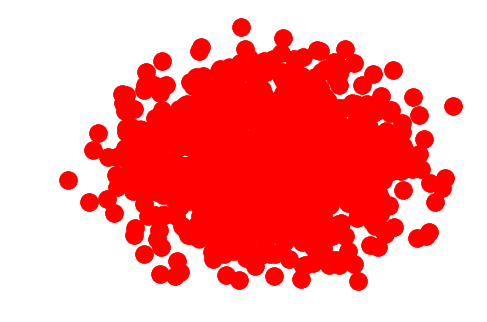

In [71]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [60]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  5051  nodes.
Aligned graph have  10352  edges.


In [61]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  5272  nodes.
Target graph have  19948  edges.


In [62]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  1423777
Total Weight in Target:  2147421


In [63]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  802
number of different connected components in Target graph:  780


In [64]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'dm10686', 'ce15101', 'dm1427', 'ce15525', 'dm10579', 'ce15132', 'dm10728', 'dm10685', 'dm10559', 'ce14901', 'ce15043', 'ce15097', 'ce14832', 'dm10652', 'ce15046', 'ce15186', 'dm10858', 'dm10053', 'dm10859', 'dm10777', 'dm10117', 'ce14947', 'ce15190', 'ce14944', 'ce11574', 'dm9980', 'ce15095', 'ce15098', 'dm10318', 'dm10638', 'ce15184', 'dm10295', 'dm10261', 'ce15130', 'ce14943', 'ce14902', 'ce15320', 'dm10710', 'ce14946', 'ce15208', 'ce13735', 'ce15044', 'dm10998', 'ce15217', 'dm10561'}, {'dm8353', 'ce4944', 'dm650', 'ce8405', 'dm6855', 'ce15478', 'dm7439', 'dm3500', 'dm1248', 'dm7027', 'ce2986', 'dm1130', 'ce7953', 'dm2813', 'ce3367', 'ce4924', 'ce68', 'dm4056', 'ce3160', 'dm6010', 'dm2977', 'ce1674', 'dm4756', 'dm1861', 'ce547', 'dm9339', 'dm5789', 'ce4413', 'dm8231', 'dm4521', 'dm3386', 'dm9748', 'dm12957', 'dm2199', 'dm7381', 'dm2623', 'dm489', 'dm7792', 'ce2731', 'dm1107', 'dm488', 'ce2218', 'dm3015', 'ce16716', 'dm8213', 'ce8738', 'dm4317', 'ce5922', 'ce1767', 'ce1373', 'dm461

In [65]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [66]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

772


In [67]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  2039
Largest common connected graph in Target graph:  2417


### check for mistake align

In [55]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# draw graphs

In [0]:
nx.draw_networkx(G1, with_labels = True)

In [0]:
nx.draw_networkx(G2)

In [0]:
import matplotlib.pyplot as plt
nx.draw(G_target_na)
plt.show()

In [68]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("ratio EC: ",ratio_ec)

total EC:  197.93609843222862
ratio EC:  51.89492680970523


In [69]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("ratio ICS: ",ratio_ics)

total ICS:  95.4084560933614
ratio ICS:  51.89492680970523


In [70]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("ratio S3: ",ratio_s3)

total S3:  180.72114513498823
ratio S3:  27.76079296915413


# compute FC

In [2]:
import pickle
with open('ce-dm-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

In [3]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['ce5307', 'dm293'],
 ['ce3328', 'dm6452'],
 ['ce712', 'dm2126'],
 ['ce6711', 'dm2794'],
 ['ce14479', 'dm9820'],
 ['ce1792', 'dm458'],
 ['ce3033', 'dm5569'],
 ['ce1697', 'dm1649'],
 ['ce9766', 'dm3497'],
 ['ce1921', 'dm1328'],
 ['ce1541', 'dm2243'],
 ['ce409', 'dm1444'],
 ['ce2340', 'dm2617'],
 ['ce6957', 'dm1682'],
 ['ce9381', 'dm2997'],
 ['ce11402', 'dm9625'],
 ['ce12914', 'dm4013'],
 ['ce1898', 'dm4626'],
 ['ce4871', 'dm4481'],
 ['ce4290', 'dm3378'],
 ['ce741', 'dm1192'],
 ['ce1686', 'dm4787'],
 ['ce7880', 'dm5606'],
 ['ce3557', 'dm271'],
 ['ce12268', 'dm9359'],
 ['ce7026', 'dm6018'],
 ['ce799', 'dm1048'],
 ['ce7430', 'dm5616'],
 ['ce4307', 'dm7381'],
 ['ce1434', 'dm3883'],
 ['ce4924', 'dm3357'],
 ['ce2528', 'dm1301'],
 ['ce2980', 'dm8315'],
 ['ce18427', 'dm12242'],
 ['ce1201', 'dm3010'],
 ['ce10019', 'dm8371'],
 ['ce888', 'dm13'],
 ['ce108', 'dm662'],
 ['ce5393', 'dm7787'],
 ['ce8405', 'dm168'],
 ['ce541', 'dm129'],
 ['ce15426', 'dm1363'],
 ['ce16372', 'dm117'],
 ['ce1917', 'dm117

# load ontology and create DAG graph

In [4]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

0
0                                GO:0046431 GO:0019599\n
1                                GO:0046430 GO:0019595\n
2                                GO:0046432 GO:0019361\n
3                                GO:0034198 GO:0060733\n
4                                GO:0046343 GO:0019872\n
5                                GO:0034193 GO:0034195\n
6                                GO:0034192 GO:0034194\n
7                                GO:0034190 GO:0034191\n
8                     GO:0046437 GO:0030632 GO:0070179\n
9                                GO:0046340 GO:0046342\n
10     GO:0030852 GO:0045658 GO:0030853 GO:0045643 GO...
11         GO:0030853 GO:0045659 GO:0045644 GO:0045641\n
12         GO:0030851 GO:0030221 GO:0030223 GO:0030222\n
13     GO:0030856 GO:0003339 GO:0030860 GO:0045601 GO...
14     GO:0030857 GO:0045602 GO:0030861 GO:0045617 GO...
15         GO:0030854 GO:0045645 GO:0045642 GO:0045660\n
16     GO:0030855 GO:0030859 GO:0030216 GO:0072192 GO...
17         GO:0030858 GO:0045603 GO:0030862 GO:0045618\n
18                               GO:0030859 GO:0045198\n
19                               GO:0031106 GO:0032186\n
20                    GO:0031105 GO:0032151 GO:0032152\n
21         GO:0031103 GO:0014814 GO:0048673 GO:0014012\n
22                    GO:0031102 GO:0031104 GO:0031103\n
23                    GO:0031109 GO:0046785 GO:0007019\n
24                    GO:0050832 GO:0009817 GO:0019732\n
25                               GO:0050833 GO:0005477\n
26                               GO:0050831 GO:0006962\n
27                               GO:0034776 GO:0071420\n
28                    GO:0045354 GO:0045355 GO:0045356\n
29                    GO:0030557 GO:0030560 GO:0030564\n
...                                                  ...
11284                 GO:0015732 GO:0032310 GO:0071720\n
11285  GO:0048338 GO:0048381 GO:0048402 GO:0048352 GO...
11286                            GO:0015730 GO:0015731\n
11287                 GO:0015736 GO:0015738 GO:0015737\n
11288                            GO:0015735 GO:0015736\n
11289                            GO:0052068 GO:0052069\n
11290                            GO:0070629 GO:0070630\n
11291                 GO:0052065 GO:0052265 GO:0052389\n
11292  GO:0070252 GO:0006932 GO:0033275 GO:0060327 GO...
11293                            GO:0043454 GO:0019487\n
11294  GO:0043455 GO:0043456 GO:0010371 GO:0009962 GO...
11295      GO:0042548 GO:0043155 GO:0042549 GO:0042550\n
11296      GO:0043450 GO:0009811 GO:0019370 GO:0009693\n
11297  GO:0043451 GO:0042184 GO:0042216 GO:0019337 GO...
11298      GO:0043452 GO:0043454 GO:0018864 GO:0043453\n
11299                            GO:0016427 GO:0016428\n
11300                 GO:0016426 GO:0016430 GO:0016429\n
11301                            GO:0001565 GO:0001566\n
11302  GO:0016423 GO:0004809 GO:0008176 GO:0009020 GO...
11303  GO:0016421 GO:0004658 GO:0004485 GO:0047925 GO...
11304      GO:0016420 GO:0050736 GO:0050735 GO:0016419\n
11305      GO:0045676 GO:0045501 GO:0045678 GO:0045677\n
11306                 GO:0070259 GO:0070260 GO:0017005\n
11307                            GO:0019191 GO:0022874\n
11308                            GO:0019196 GO:0022876\n
11309                            GO:0019194 GO:0022871\n
11310                            GO:0019198 GO:0005001\n
11311      GO:0019199 GO:0004675 GO:0004714 GO:0009784\n
11312                 GO:0070255 GO:0070256 GO:0070257\n
11313                 GO:0045679 GO:0045681 GO:0045680\n

[11314 rows x 1 columns]

In [5]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [6]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0060163', '0071114', '0044241', '0033816', '0035424', '0001986', '0032092', '0046942', '0030329', '0034784', '0090059', '0035428', '0018778', '0072159', '0018625', '0032031', '0015971', '0019502', '0007366', '0006687', '0009138', '0050987', '0034690', '0010380', '0033947', '0007417', '0002173', '0032599', '0051903', '0045165', '0050774', '0034886', '0002394', '0031842', '0015951', '0051173', '0032575', '0090363', '0019932', '0046878', '0051285', '0044240', '0042963', '0046917', '0045391', '0004012', '0007229', '0015825', '0075216', '0014823', '0019374', '0048012', '0014726', '0072137', '0047794', '0006705', '0045839', '0032000', '0002287', '0050369', '0000209', '0015946', '0000736', '0060852', '0075026', '0004392', '0015182', '0001833', '0042488', '0035165', '0052376', '0060427', '0071435', '0046939', '0044023', '0001891', '0006072', '0015818', '0042785', '0006348', '0042765', '0016217', '0060295', '0048813', '0019571', '0032608', '0007166', '0030730', '0015914', '0003283', '0042012'

In [7]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [8]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [11]:
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('dm' in tree[i][j] or 'ce' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

10446 20892
10446


In [12]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.6265249587129081
